# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from dython.nominal import associations
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
import scikitplot as skplt
import scipy.stats as stats
from sklearn.metrics import log_loss
import scipy
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV

In [2]:
file = pd.read_excel('D:/Pilot/data/Loan_Default_Dataset/RawData.xlsx')
file.head()

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default,Credit History Length
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA - Exploratory Data Analysis (to understand what the model included)

- Getting insights from data and visualizing them

In [3]:
file.shape

(32581, 13)

In [4]:
file.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Credit History Length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16291.000000,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.468897,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,1.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8146.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16291.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24436.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32581.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           32581 non-null  int64  
 1   Age                                          32581 non-null  int64  
 2   Annual Income                                32581 non-null  int64  
 3   Home Ownership                               32581 non-null  object 
 4   Employment Length (in years)                 31686 non-null  float64
 5   Loan Intent                                  32581 non-null  object 
 6   Loan Grade                                   32581 non-null  object 
 7   Loan Amount                                  32581 non-null  int64  
 8   Interest Rate                                29465 non-null  float64
 9   Loan Status (0 is non default 1 is default)  32581 non-null  int64  
 10

# Missing Values / No of Null / No of Zeros

In [6]:
# Count number of zeros in all columns of Dataframe

for column_name in file.columns:
    column = file[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, 'is: ', count)

Count of zeros in column Id is:  0
Count of zeros in column Age is:  0
Count of zeros in column Annual Income is:  0
Count of zeros in column Home Ownership is:  0
Count of zeros in column Employment Length (in years) is:  4105
Count of zeros in column Loan Intent is:  0
Count of zeros in column Loan Grade is:  0
Count of zeros in column Loan Amount is:  0
Count of zeros in column Interest Rate is:  0
Count of zeros in column Loan Status (0 is non default 1 is default) is:  25473
Count of zeros in column Percent Income is:  9
Count of zeros in column Historical Default is:  0
Count of zeros in column Credit History Length is:  0


In [7]:
file.isnull().sum()

Id                                                0
Age                                               0
Annual Income                                     0
Home Ownership                                    0
Employment Length (in years)                    895
Loan Intent                                       0
Loan Grade                                        0
Loan Amount                                       0
Interest Rate                                  3116
Loan Status (0 is non default 1 is default)       0
Percent Income                                    0
Historical Default                                0
Credit History Length                             0
dtype: int64

# Handling Missing Data

In [8]:
# Employement Length replace null as mean 
# but since Employment Length using in years, we need int only 
# mean took from file.describe()

mean = 4.789686
file['Employment Length (in years)'] = file['Employment Length (in years)'].replace(np.nan, round(mean))
  
file.isnull().sum()

Id                                                0
Age                                               0
Annual Income                                     0
Home Ownership                                    0
Employment Length (in years)                      0
Loan Intent                                       0
Loan Grade                                        0
Loan Amount                                       0
Interest Rate                                  3116
Loan Status (0 is non default 1 is default)       0
Percent Income                                    0
Historical Default                                0
Credit History Length                             0
dtype: int64

In [9]:
# Interest Rate drop those null value 
# Since Interest Rate was stated by Bank Negara, we cannot adjust it

file = file.dropna()
file.isnull().sum()

Id                                             0
Age                                            0
Annual Income                                  0
Home Ownership                                 0
Employment Length (in years)                   0
Loan Intent                                    0
Loan Grade                                     0
Loan Amount                                    0
Interest Rate                                  0
Loan Status (0 is non default 1 is default)    0
Percent Income                                 0
Historical Default                             0
Credit History Length                          0
dtype: int64

In [10]:
file.shape

(29465, 13)

# Correlation

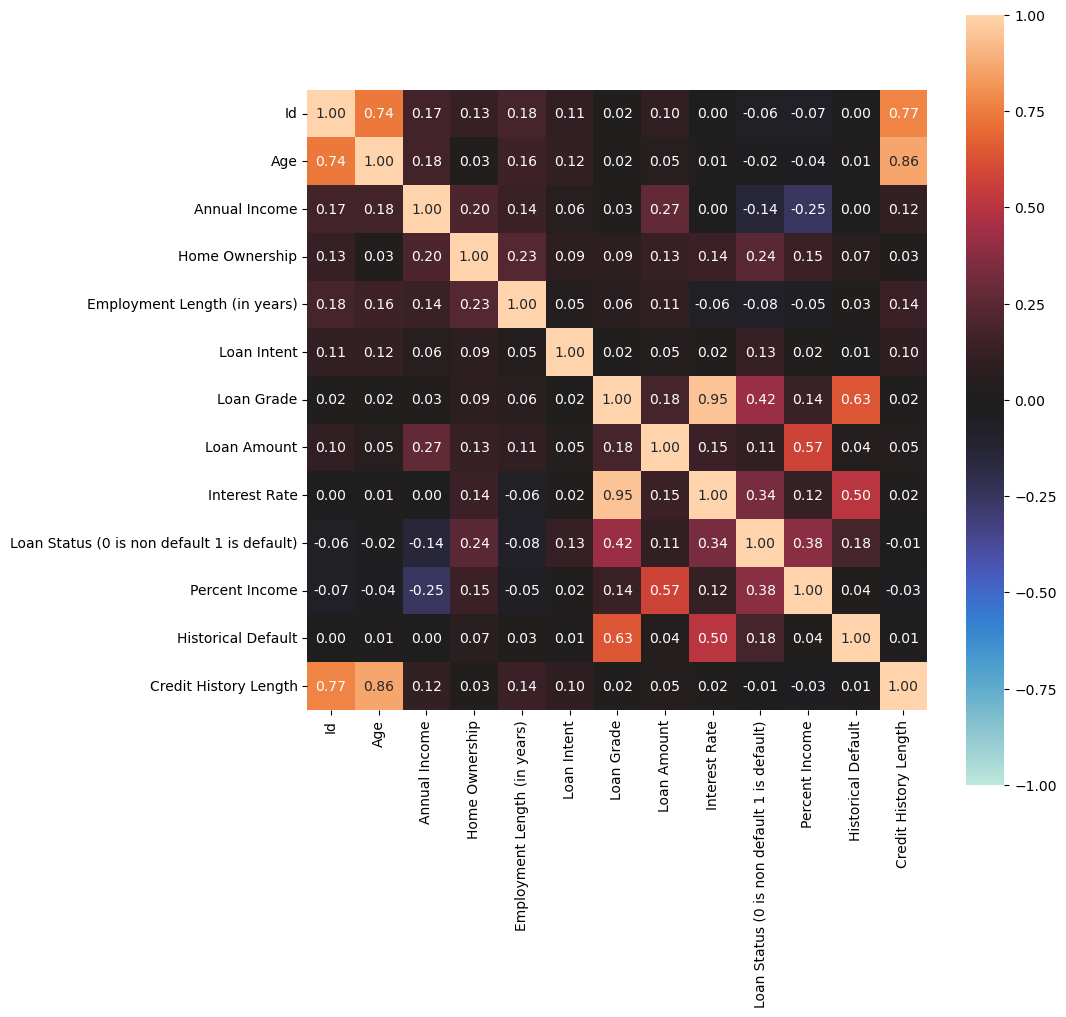

In [11]:
categorical_correlation= associations(file, filename= 'categorical_correlation.png', figsize=(10,10))

In [12]:
# remove Credit History length since it is highly correlated with Age 

file = file.drop('Credit History Length',axis=1)
file.shape

(29465, 12)

#  Target Variable’s Distribution

In [13]:
file['Loan Status (0 is non default 1 is default)'].value_counts()

0    23001
1     6464
Name: Loan Status (0 is non default 1 is default), dtype: int64

In [14]:
file['Loan Status (0 is non default 1 is default)'].value_counts(normalize=True)

0    0.780621
1    0.219379
Name: Loan Status (0 is non default 1 is default), dtype: float64

If you check the ratio between Loan Status=1 and Loan Status=0, it is 2:1 which means our dataset is imbalanced.

for our case, it is not even 2:1, hence consider our model is imbalance

- From industry side, we consider it is make sense. So we can directly do the logistic regression. (Logistic Regression)
- In theory, we have to do something to deal with class imbalance. (Weighted Logistic Regression)

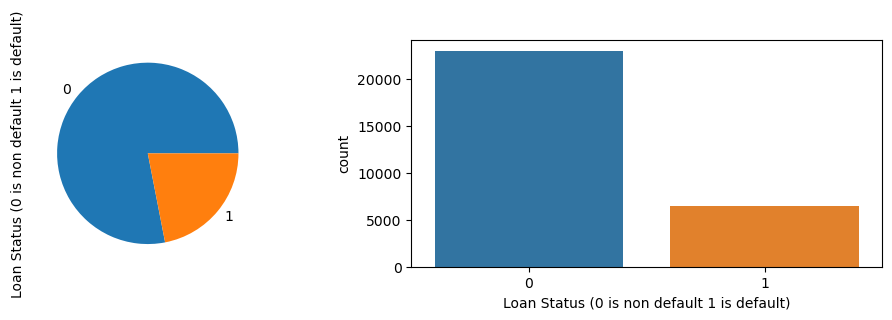

In [15]:
# chart for distribution of target variable

fig= plt.figure(figsize=(10,3) )

fig.add_subplot(1,2,1)
pieChart = file['Loan Status (0 is non default 1 is default)'].value_counts(normalize=True).plot.pie()

fig.add_subplot(1,2,2)
barChart = sns.countplot(x=file['Loan Status (0 is non default 1 is default)'])

plt.tight_layout()
plt.show()

# Data Visualization_Numerical (Bar Chart) (Normalization)

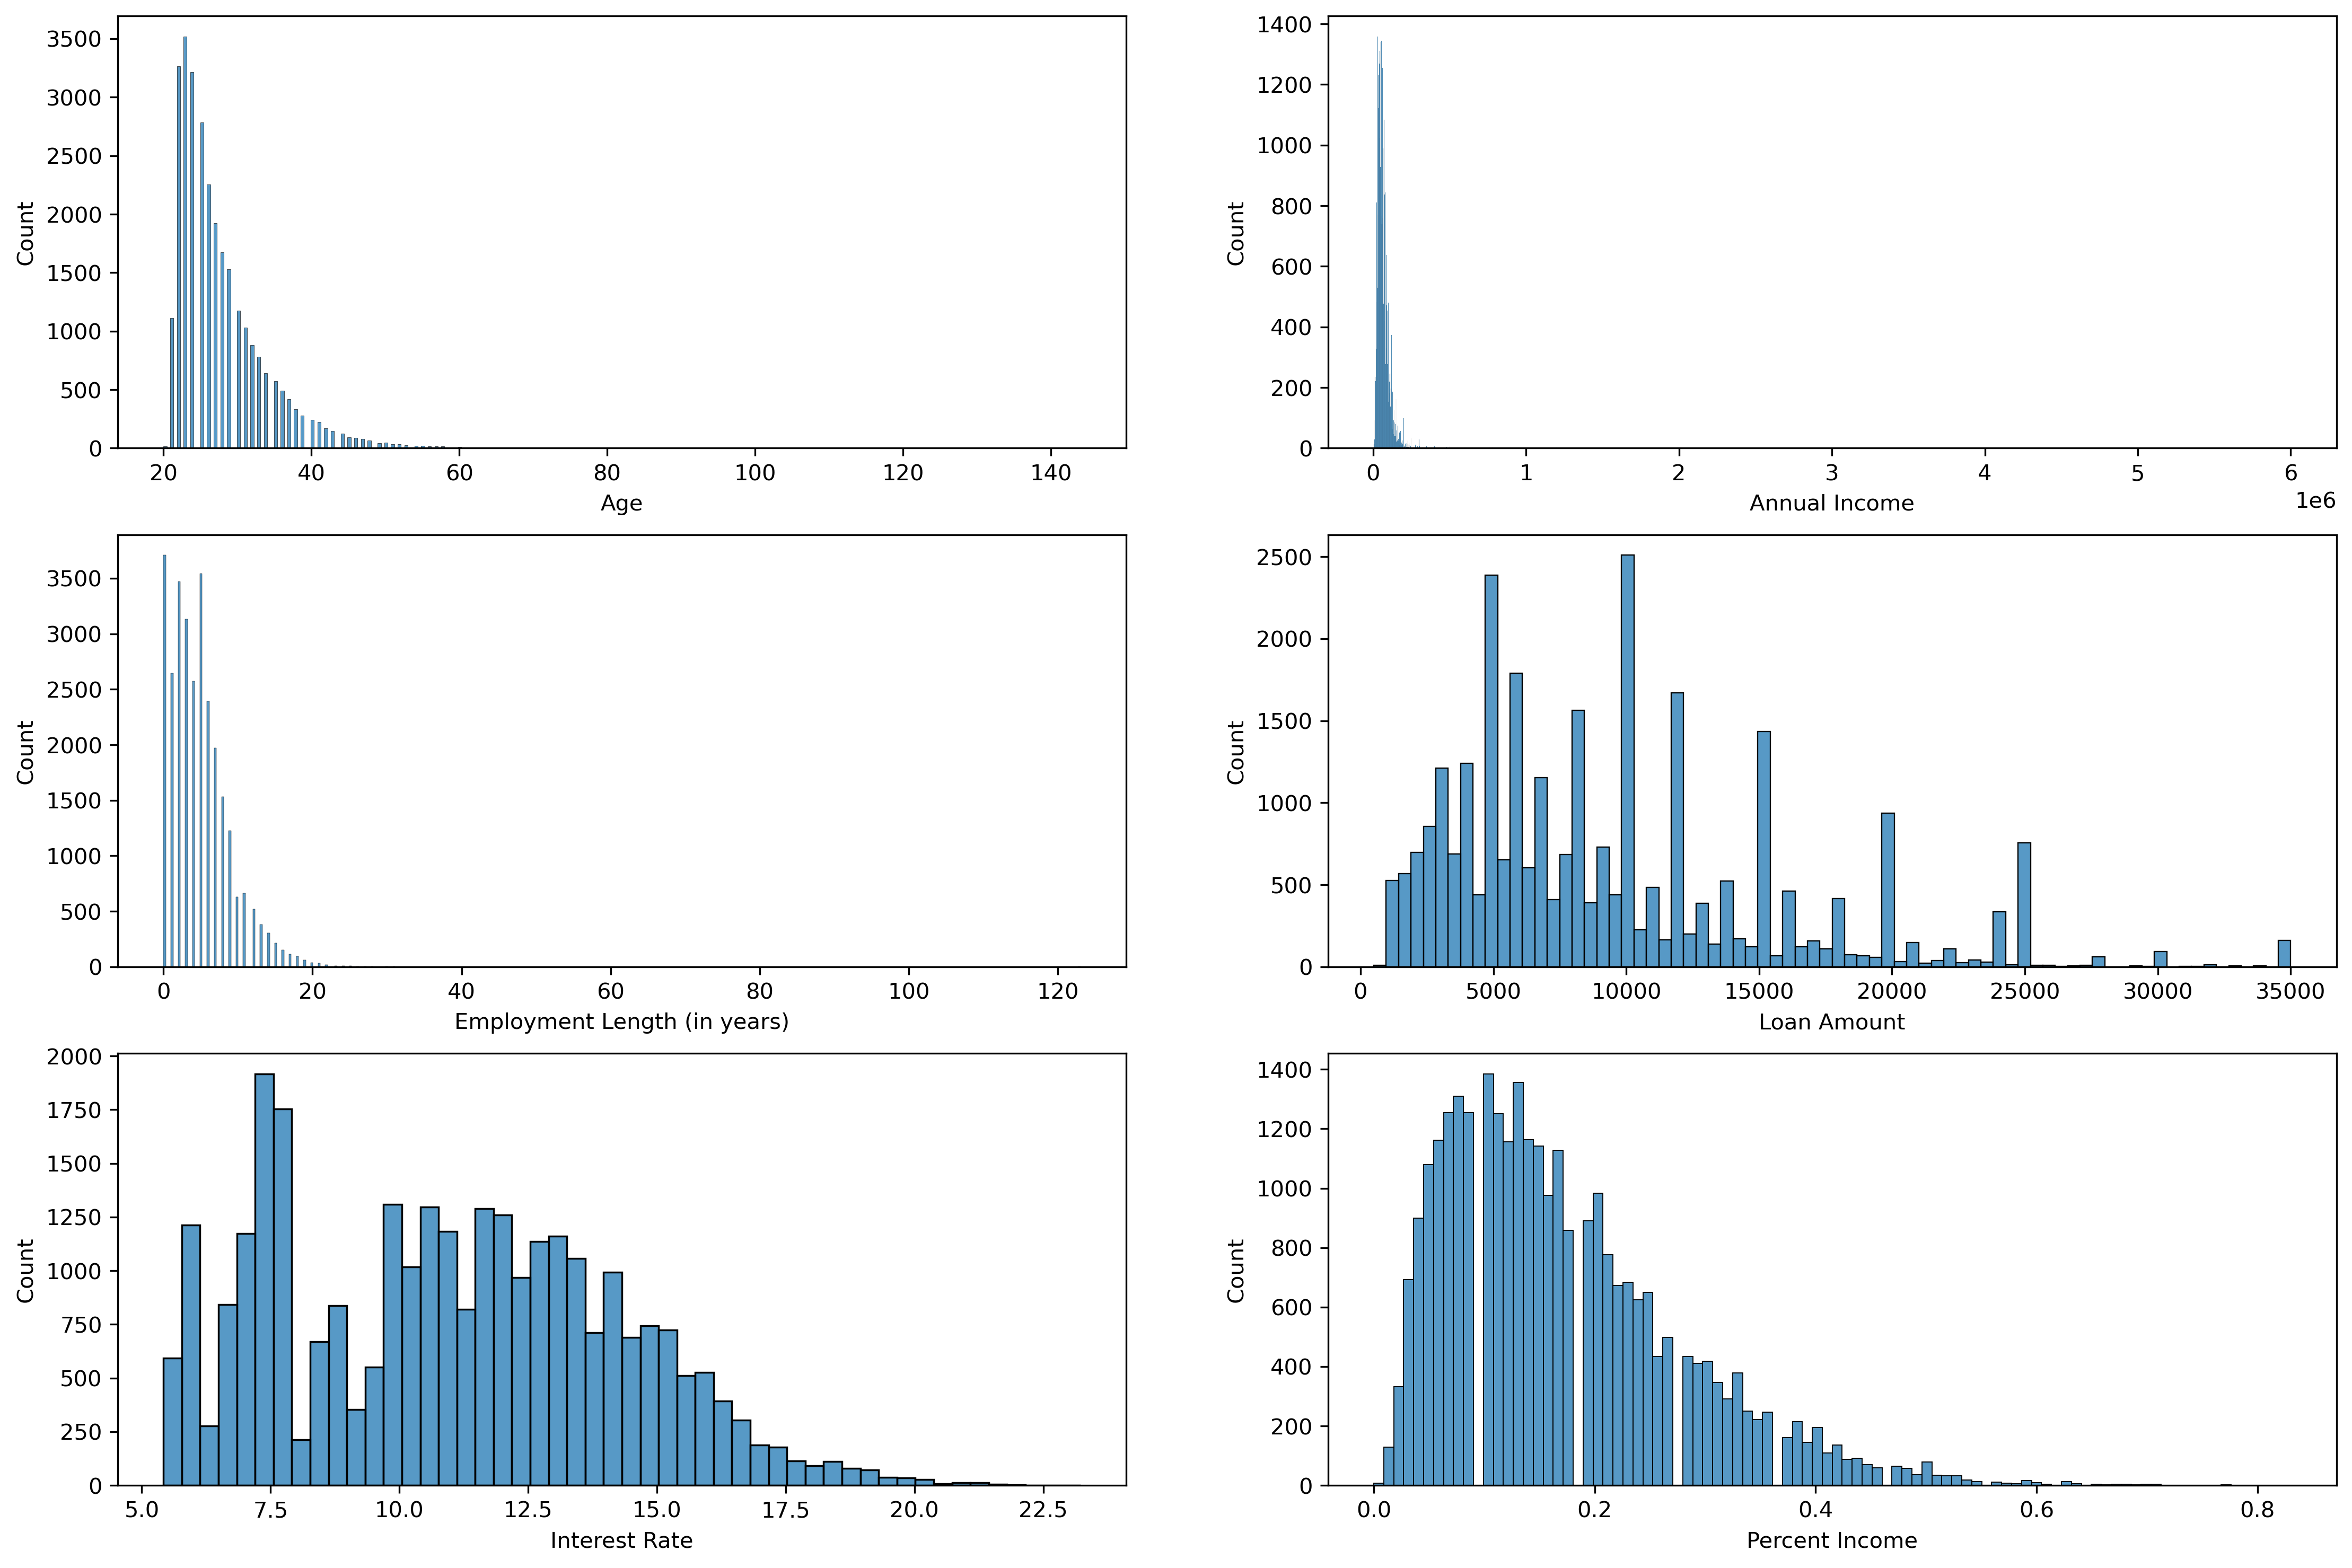

In [16]:
# All the numerical Data plot 

features = [ 'Age', 'Annual Income', 'Employment Length (in years)', 'Loan Amount', 'Interest Rate', 'Percent Income']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.histplot(x = i[1], data = file)
plt.show()

# Data Visualization_Numerical (Box Plot)

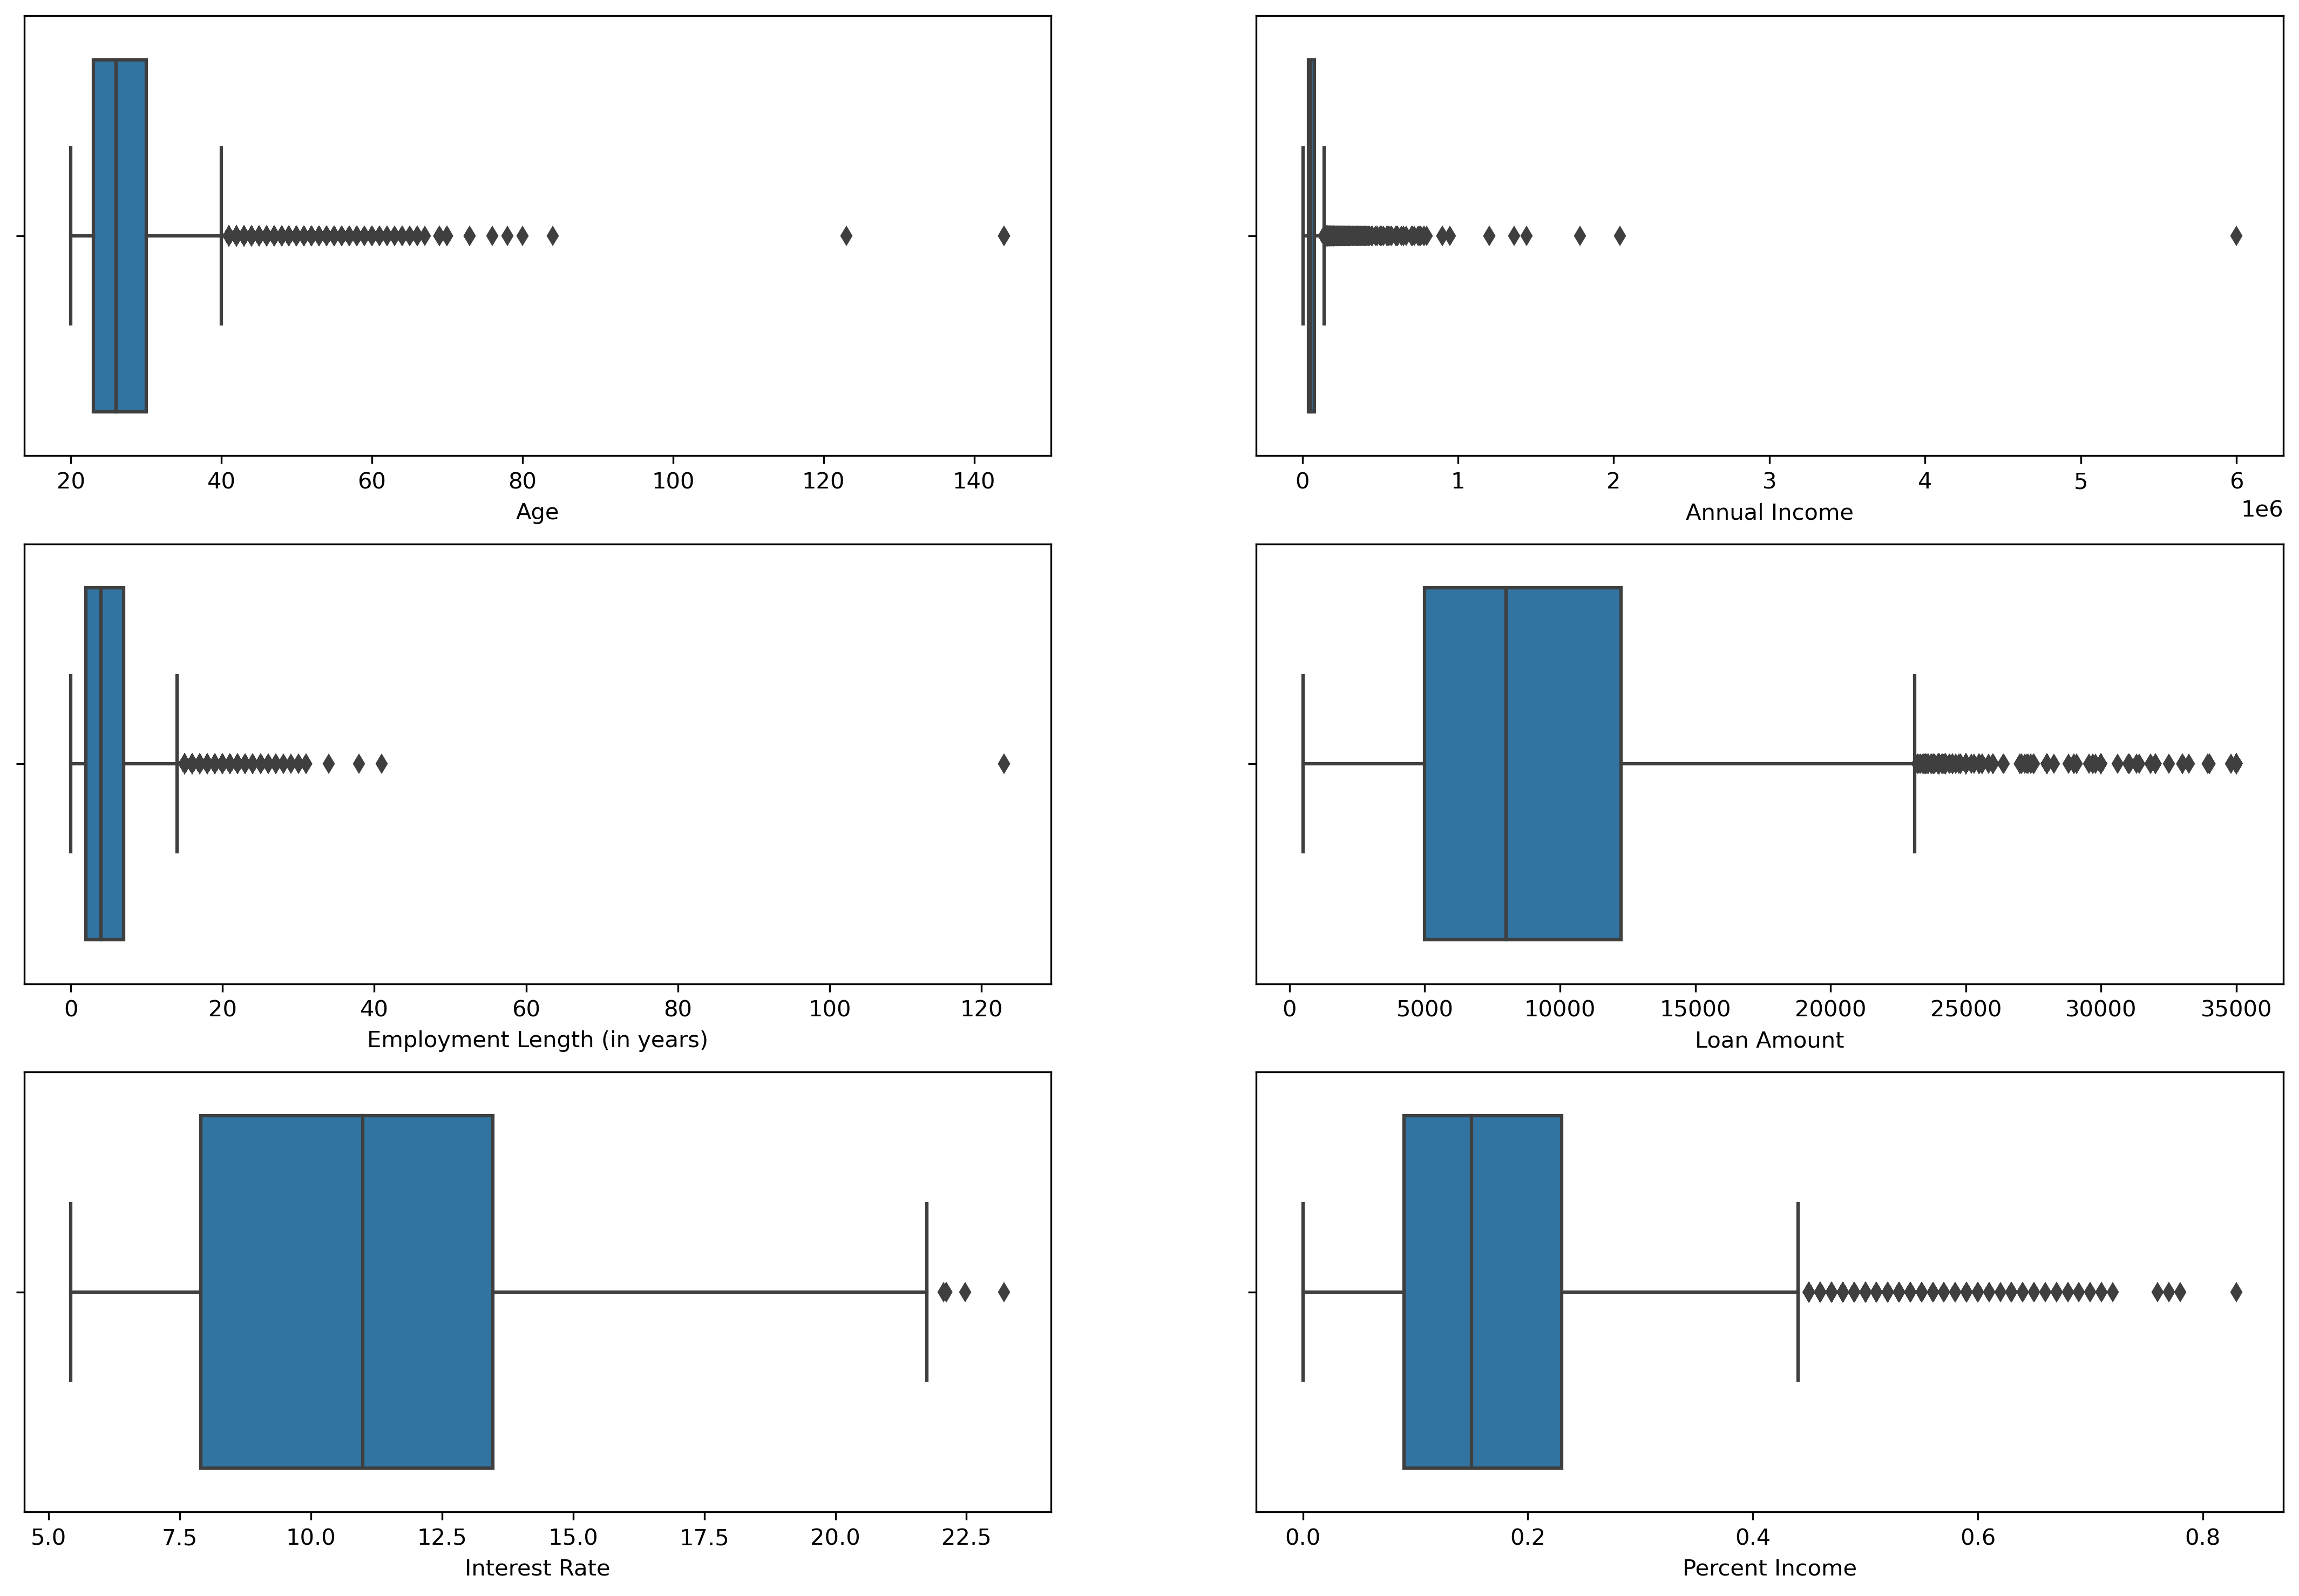

In [17]:
# put all the box plot in one subplot 

features = [ 'Age', 'Annual Income', 'Employment Length (in years)', 'Loan Amount', 'Interest Rate','Percent Income']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = file)
plt.show()

# Data Visualization_Categorical (Crosstab & Side-by-Side Bar Chart)

#### Home Ownership---------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
crossTabHomeOwnership = pd.crosstab(file['Home Ownership'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabHomeOwnership

Loan Status (0 is non default 1 is default),0,1,All
Home Ownership,,,
MORTGAGE,10583,1539,12122
OTHER,67,27,94
OWN,2187,169,2356
RENT,10164,4729,14893
All,23001,6464,29465


In [19]:
crossTabHomeOwnership['Default Rate'] = ((crossTabHomeOwnership.iloc[:,1]) / (crossTabHomeOwnership.iloc[:,-1])) *100
crossTabHomeOwnership

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Home Ownership,,,,
MORTGAGE,10583,1539,12122,12.695925
OTHER,67,27,94,28.723404
OWN,2187,169,2356,7.173175
RENT,10164,4729,14893,31.753173
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Home Ownership'>

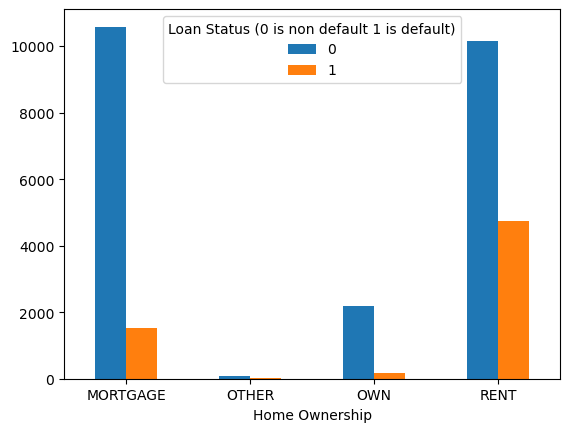

In [20]:
crossTabHomeOwnership = pd.crosstab(file['Home Ownership'], file['Loan Status (0 is non default 1 is default)'])
barHomeOwnership = crossTabHomeOwnership.plot.bar(rot=0)
barHomeOwnership

#### Loan Intent-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
crossTabLoanIntent = pd.crosstab(file['Loan Intent'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabLoanIntent

Loan Status (0 is non default 1 is default),0,1,All
Loan Intent,,,
DEBTCONSOLIDATION,3357,1346,4703
EDUCATION,4843,1011,5854
HOMEIMPROVEMENT,2427,863,3290
MEDICAL,3980,1471,5451
PERSONAL,4004,1010,5014
VENTURE,4390,763,5153
All,23001,6464,29465


In [22]:
crossTabLoanIntent['Default Rate'] = ((crossTabLoanIntent.iloc[:,1]) / (crossTabLoanIntent.iloc[:,-1])) *100
crossTabLoanIntent

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Loan Intent,,,,
DEBTCONSOLIDATION,3357,1346,4703,28.620030
EDUCATION,4843,1011,5854,17.270243
HOMEIMPROVEMENT,2427,863,3290,26.231003
MEDICAL,3980,1471,5451,26.985874
PERSONAL,4004,1010,5014,20.143598
VENTURE,4390,763,5153,14.806909
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Loan Intent'>

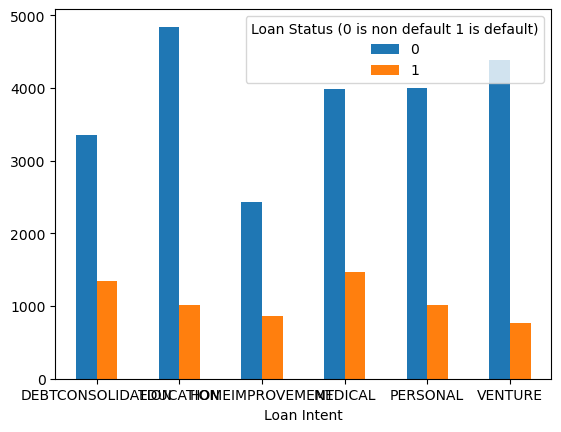

In [23]:
crossTabLoanIntent = pd.crosstab(file['Loan Intent'], file['Loan Status (0 is non default 1 is default)'])
barLoanIntent = crossTabLoanIntent.plot.bar(rot=0)
barLoanIntent

#### Loan Grade-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
crossTabLoanGrade = pd.crosstab(file['Loan Grade'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabLoanGrade

Loan Status (0 is non default 1 is default),0,1,All
Loan Grade,,,
A,8797,977,9774
B,7867,1528,9395
C,4619,1209,5828
D,1343,1971,3314
E,310,571,881
F,64,150,214
G,1,58,59
All,23001,6464,29465


In [25]:
crossTabLoanGrade['Default Rate'] = ((crossTabLoanGrade.iloc[:,1]) / (crossTabLoanGrade.iloc[:,-1])) *100
crossTabLoanGrade

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Loan Grade,,,,
A,8797,977,9774,9.995908
B,7867,1528,9395,16.263970
C,4619,1209,5828,20.744681
D,1343,1971,3314,59.474955
E,310,571,881,64.812713
F,64,150,214,70.093458
G,1,58,59,98.305085
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Loan Grade'>

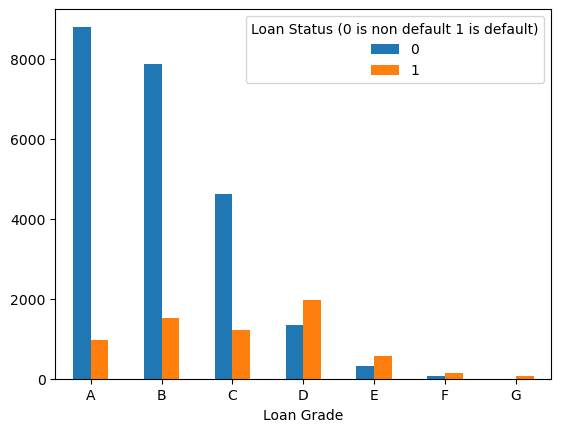

In [26]:
crossTabLoanGrade = pd.crosstab(file['Loan Grade'], file['Loan Status (0 is non default 1 is default)'])
barLoanGrade = crossTabLoanGrade.plot.bar(rot=0)
barLoanGrade

#### Historical default----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
crossTabHistoricalDefault = pd.crosstab(file['Historical Default'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabHistoricalDefault

Loan Status (0 is non default 1 is default),0,1,All
Historical Default,,,
N,19770,4482,24252
Y,3231,1982,5213
All,23001,6464,29465


In [28]:
crossTabHistoricalDefault['Default Rate'] = ((crossTabHistoricalDefault.iloc[:,1]) / (crossTabHistoricalDefault.iloc[:,-1])) *100
crossTabHistoricalDefault

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Historical Default,,,,
N,19770,4482,24252,18.480950
Y,3231,1982,5213,38.020334
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Historical Default'>

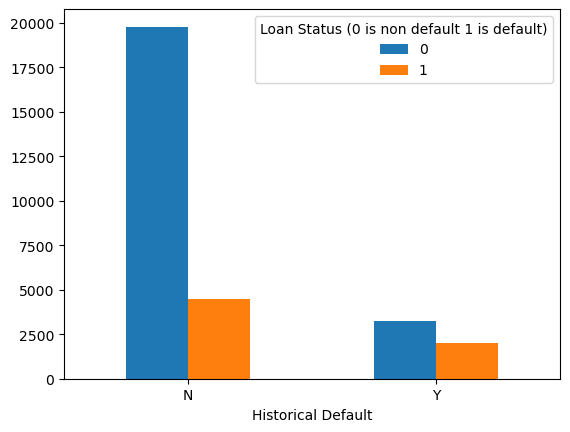

In [29]:
crossTabHistoricalDefault = pd.crosstab(file['Historical Default'], file['Loan Status (0 is non default 1 is default)'])
barHistoricalDefault = crossTabHistoricalDefault.plot.bar(rot=0)
barHistoricalDefault

# Finding and Handling Outlier (with IQR)

In [30]:
# create a function to find outliers using IQR

def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower_limit = q1-1.5*IQR 
    upper_limit = q3+1.5*IQR 
    print('q1: ' + str(q1))
    print('q3: ' + str(q3))
    print('lower limit: ' + str(lower_limit))
    print('upper limit: ' + str(upper_limit) + '\n')
    outliers = data[((data<(lower_limit)) | (data>(upper_limit)))]
    return outliers

In [31]:
# create a function to drop outlier

def drop_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    not_outliers = file[~((data<(lower_limit)) | (data>(upper_limit)))]
    return not_outliers

#### Age-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
# follow IQR to find the Age's outlier 

AgeOutlier = find_outliers_IQR(file['Age'])
print("number of outliers: "+ str(len(AgeOutlier)))
print("max outlier value: "+ str(AgeOutlier.max()))
print("min outlier value: "+ str(AgeOutlier.min()))
AgeOutlier

q1: 23.0
q3: 30.0
lower limit: 12.5
upper limit: 40.5

number of outliers: 1331
max outlier value: 144
min outlier value: 41


81       144
183      144
575      123
29121     50
29131     43
        ... 
32576     57
32577     54
32578     65
32579     56
32580     66
Name: Age, Length: 1331, dtype: int64

In [33]:
# we do not replace outlier according IQR but follow the guidelines
# file_RemoveAge = drop_outliers_IQR(file['Age'])
# file_RemoveAge

In [34]:
# follow guidelines
# remove those outlier (<21 and >60)

lower_limit = 21
upper_limit = 60
AgeOutlier = file[(file['Age']<(lower_limit)) | (file['Age']>(upper_limit))]
print("number of outliers: "+ str(len(AgeOutlier)))
not_outliers = file[~((file['Age']<(lower_limit)) | (file['Age']>(upper_limit)))]
file_RemoveAge = not_outliers
file_RemoveAge

number of outliers: 73


,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

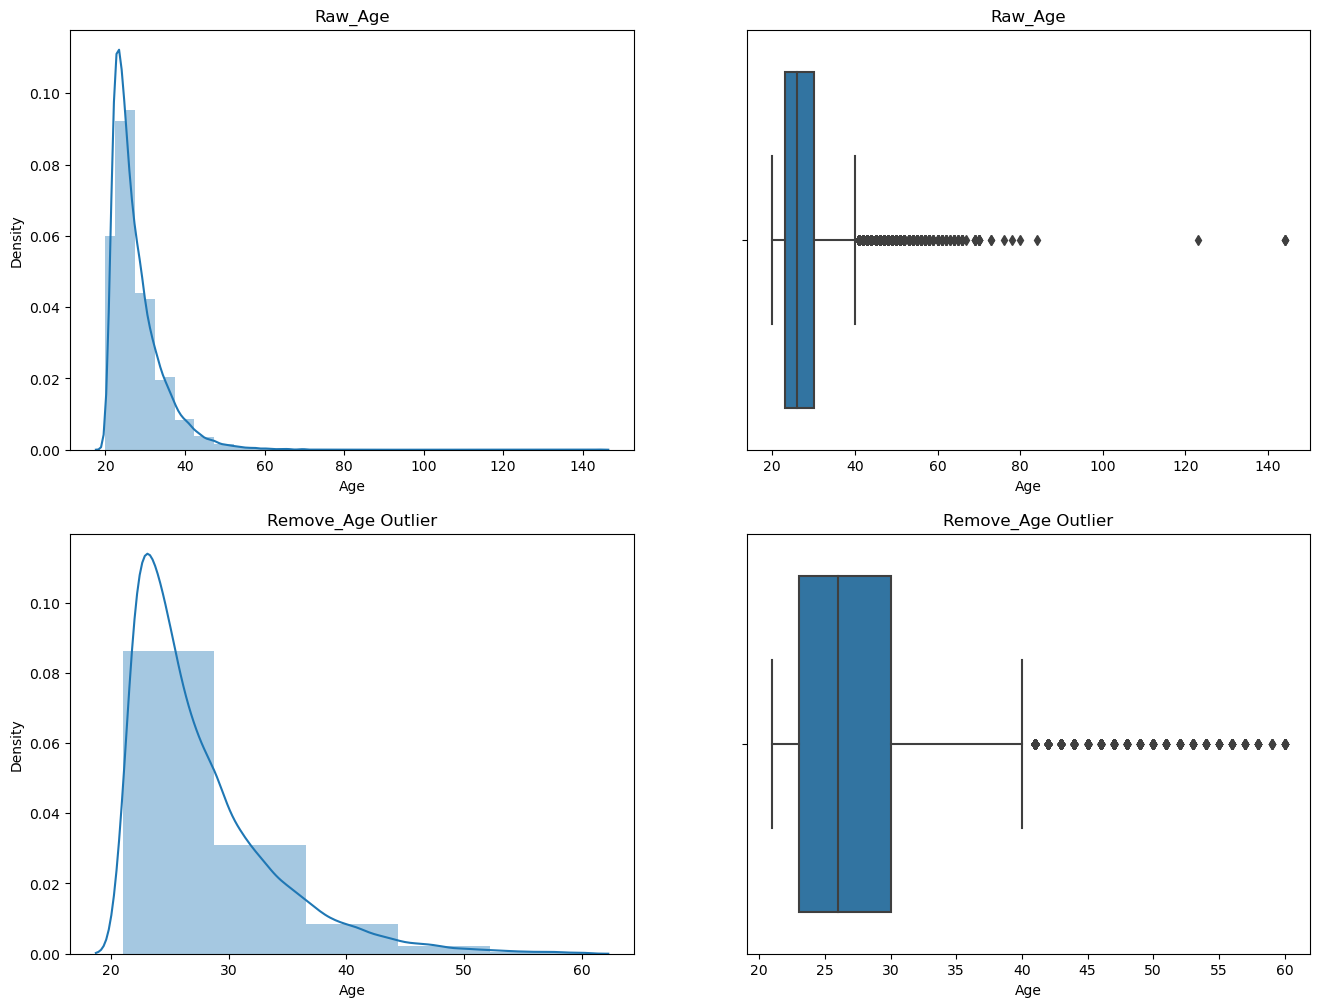

In [35]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.distplot(file['Age']).set_title('Raw_Age')
plt.subplot(2,2,2)
sns.boxplot(file['Age']).set_title('Raw_Age')

plt.subplot(2,2,3)
sns.distplot(file_RemoveAge['Age'], bins=5).set_title('Remove_Age Outlier')
plt.subplot(2,2,4)
sns.boxplot(file_RemoveAge['Age']).set_title('Remove_Age Outlier')
plt.show()

In [36]:
Age_Before_After = pd.DataFrame([['Age_Before', file.shape]],
                   columns = ['Column', 'Shape'])

Age_Remove = pd.DataFrame([['Age_Remove', file_RemoveAge.shape]],
                   columns = ['Column', 'Shape'])

Age_Before_After = Age_Before_After.append(Age_Remove, ignore_index = True)
Age_Before_After


C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\868356533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Age_Before_After = Age_Before_After.append(Age_Remove, ignore_index = True)


,Column,Shape
0,Age_Before,"(29465, 12)"
1,Age_Remove,"(29392, 12)"


#### Annual Income-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
# to make sure get the original file after remove Age

file_RemoveAge_to_AnnualIncome = file_RemoveAge.copy()

In [38]:
# find Annual Income's outliers 

AnnualIncomeOutlier = find_outliers_IQR(file_RemoveAge_to_AnnualIncome['Annual Income'])
print("number of outliers: "+ str(len(AnnualIncomeOutlier)))
print("max outlier value: "+ str(AnnualIncomeOutlier.max()))
print("min outlier value: "+ str(AnnualIncomeOutlier.min()))
AnnualIncomeOutlier

q1: 38500.0
q3: 79000.0
lower limit: -22250.0
upper limit: 139750.0

number of outliers: 1447
max outlier value: 2039784
min outlier value: 139913


15       500000
20       162500
33       306000
34       300000
42       300000
          ...  
32541    163000
32543    720000
32544    780000
32551    780000
32579    150000
Name: Annual Income, Length: 1447, dtype: int64

#### remove Annual Income outlier -----------------------------------------------------------------------------------------------------------------------------------------

In [39]:
# to make sure get the original file after remove Age's outlier

file_RemoveAge_to_RemoveAnnulIncome = file_RemoveAge.copy()

In [40]:
file_RemoveAnnualIncome = file_RemoveAge_to_RemoveAnnulIncome[~((file_RemoveAge_to_RemoveAnnulIncome['Annual Income']<(-22250.0)) | (file_RemoveAge_to_RemoveAnnulIncome['Annual Income']>(139750.0)))]
file_RemoveAnnualIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [41]:
file_RemoveAnnualIncome.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,15999.691430,27.498193,58336.046162,4.705922,9261.549472,10.997406,0.225872,0.174519
std,9324.366735,5.877240,27040.609019,3.948455,6018.134696,3.236240,0.418163,0.107199
min,1.000000,21.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000
25%,7887.000000,23.000000,37900.000000,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,15921.000000,26.000000,54000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,24007.000000,30.000000,75000.000000,7.000000,12000.000000,13.470000,0.000000,0.230000
max,32578.000000,60.000000,139380.000000,123.000000,35000.000000,23.220000,1.000000,0.830000


#### replace Annual Income Outlier -------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
# to make sure get the original file after remove Age's outlier

file_RemoveAge_ReplaceAnnualIncome = file_RemoveAge.copy()

In [43]:
mean = round(file_RemoveAge_ReplaceAnnualIncome['Annual Income'].mean())
mean

65728

In [44]:
percentile5 = round(np.percentile(file_RemoveAge_ReplaceAnnualIncome['Annual Income'], 5))
print('percentile_0.05 = ', percentile5)
percentile95 = round(np.percentile(file_RemoveAge_ReplaceAnnualIncome['Annual Income'], 95))
print('percentile_0.95 = ' , percentile95)

percentile_0.05 =  23000
percentile_0.95 =  138000


In [45]:
# replace outlier with 5th and 95th percentile 

file_RemoveAge_ReplaceAnnualIncome['Annual Income'] = np.where(file_RemoveAge_ReplaceAnnualIncome['Annual Income'] < -22250.0, percentile5, file_RemoveAge_ReplaceAnnualIncome['Annual Income'])
file_RemoveAge_ReplaceAnnualIncome['Annual Income'] = np.where(file_RemoveAge_ReplaceAnnualIncome['Annual Income'] > 139750.0, percentile95, file_RemoveAge_ReplaceAnnualIncome['Annual Income'])
file_ReplaceAnnualIncome = file_RemoveAge_ReplaceAnnualIncome
file_ReplaceAnnualIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


#### compare Age's outlier in visualization ----------------------------------------------------------------------------------------------------------------------------------

In [46]:
# to make sure get the original file after remove Age's outlier

file_RemoveAge = file_RemoveAge.copy()

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

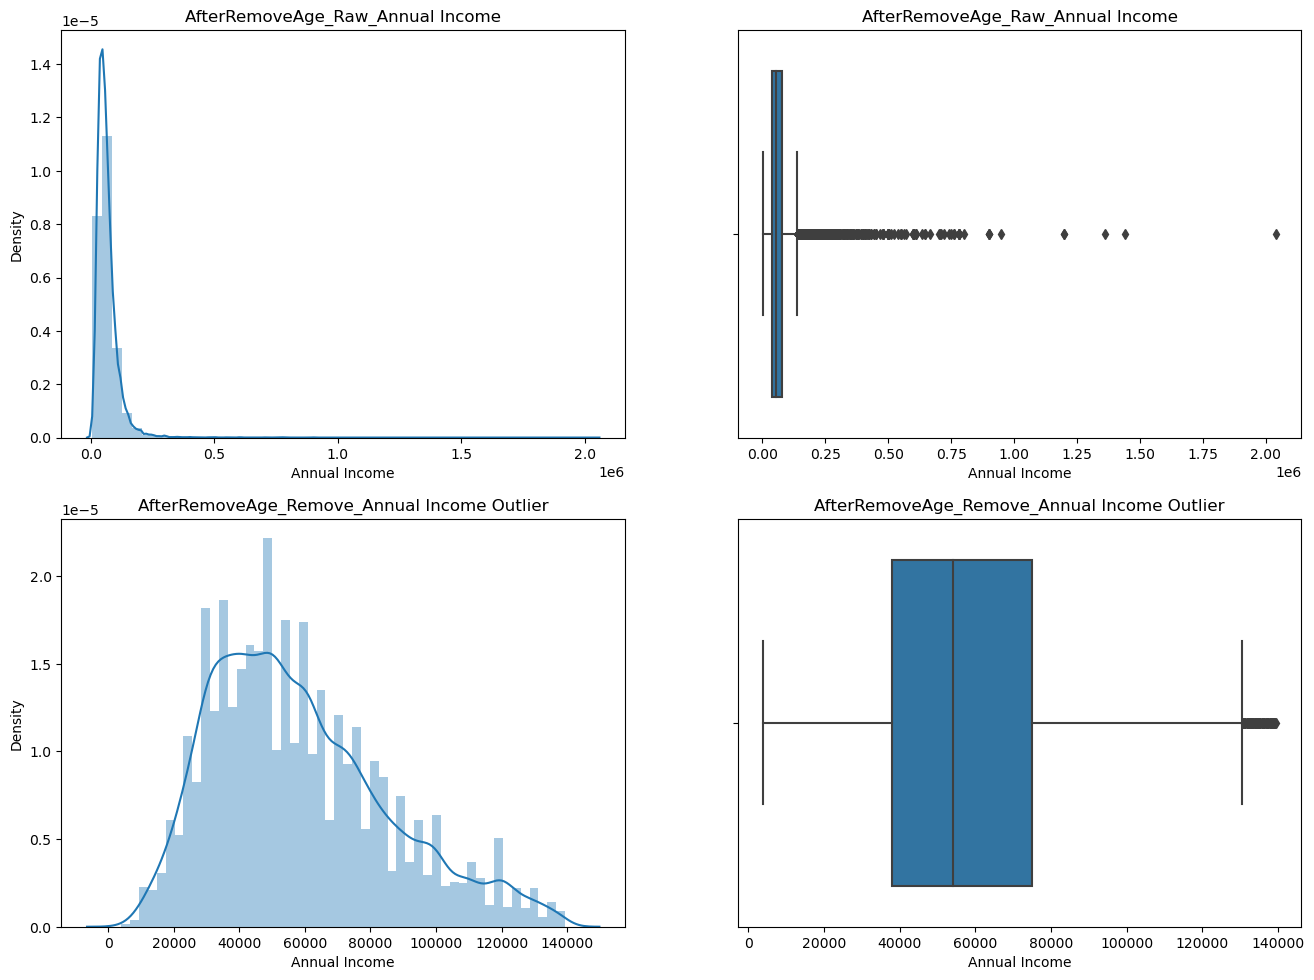

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


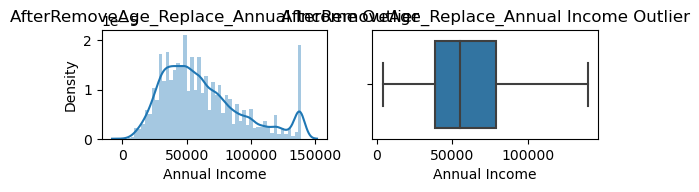

In [47]:
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.distplot(file_RemoveAge['Annual Income']).set_title('AfterRemoveAge_Raw_Annual Income')
plt.subplot(3,2,2)
sns.boxplot(file_RemoveAge['Annual Income']).set_title('AfterRemoveAge_Raw_Annual Income')

plt.subplot(3,2,3)
sns.distplot(file_RemoveAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Remove_Annual Income Outlier')
plt.subplot(3,2,4)
sns.boxplot(file_RemoveAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Remove_Annual Income Outlier')
plt.show()

plt.subplot(3,2,5)
sns.distplot(file_ReplaceAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Replace_Annual Income Outlier')
plt.subplot(3,2,6)
sns.boxplot(file_ReplaceAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Replace_Annual Income Outlier')
plt.show()

- There is no outlier in the file_RemoveAge. 

Outlier means those extract data, and we didnt detect it here because it was big, hence it will not consider as outliers from code.



- since we can see before replace those outlier with percentile of the Annual Income, the result is better and the outlier looks make sense.

Annual Income can be more than 14k it was natural outlier. Can someone earn more and someone earn less. 

Hence, we keep the natural outlier and doesnt have to replace all the outlier. 

#### check the shape of the Annual Income file ---------------------------------------------------------------------------------------------------------------------------
- to make sure we replace and remove work well

In [48]:
AnnualIncome_Before_After = pd.DataFrame([['AnnualIncome_Before', file_RemoveAge.shape]],
                   columns = ['Column', 'Shape'])

AnnualIncome_Remove = pd.DataFrame([['AnnualIncome_Remove', file_RemoveAnnualIncome.shape]],
                   columns = ['Column', 'Shape'])

AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Remove, ignore_index = True)

AnnualIncome_Replace = pd.DataFrame([['AnnualIncome_Replace', file_ReplaceAnnualIncome.shape]],
                   columns = ['Column', 'Shape'])

AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Replace, ignore_index = True)
AnnualIncome_Before_After


C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\4095684418.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Remove, ignore_index = True)
C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\4095684418.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Replace, ignore_index = True)


,Column,Shape
0,AnnualIncome_Before,"(29392, 12)"
1,AnnualIncome_Remove,"(27945, 12)"
2,AnnualIncome_Replace,"(29392, 12)"


#### Employment Length ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [49]:
# to make sure get the original file after remove Annual Income's outlier 

file_RemoveAnnualIncome_to_EmploymentLength = file_RemoveAnnualIncome.copy()
file_RemoveAnnualIncome_to_EmploymentLength

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [50]:
# find Employment Length's outlier

EmploymentLengthOutlier = find_outliers_IQR(file_RemoveAnnualIncome_to_EmploymentLength['Employment Length (in years)'])
print("number of outliers: "+ str(len(EmploymentLengthOutlier)))
print("max outlier value: "+ str(EmploymentLengthOutlier.max()))
print("min outlier value: "+ str(EmploymentLengthOutlier.min()))
EmploymentLengthOutlier

q1: 2.0
q3: 7.0
lower limit: -5.5
upper limit: 14.5

number of outliers: 678
max outlier value: 123.0
min outlier value: 15.0


0        123.0
17850     17.0
17888     18.0
17916     15.0
18014     15.0
         ...  
32500     15.0
32508     24.0
32515     38.0
32516     23.0
32519     16.0
Name: Employment Length (in years), Length: 678, dtype: float64

In [51]:
# find those not logically employment length (Employment length > Age)

term_condition = file_RemoveAnnualIncome_to_EmploymentLength['Age'] - file_RemoveAnnualIncome_to_EmploymentLength['Employment Length (in years)'] 
term_condition

0       -101.0
1         16.0
2         24.0
3         19.0
4         16.0
         ...  
32573     56.0
32574     48.0
32575     52.0
32576     56.0
32577     50.0
Length: 27945, dtype: float64

In [52]:
# remove employment length's term_condition those less than 14
# since FLSA sets 14 years old as the minimum age for employment

outlier = file_RemoveAnnualIncome_to_EmploymentLength[(term_condition<14)]
print('number of outliers: ', str(len(outlier)))
file_RemoveEmploymentLength = file_RemoveAnnualIncome_to_EmploymentLength[~(term_condition<14)]
file_RemoveEmploymentLength

number of outliers:  1


,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [53]:
# to make sure get the original file after remove Annual Income's outlier 

file_RemoveAnnualIncome = file_RemoveAnnualIncome.copy()

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

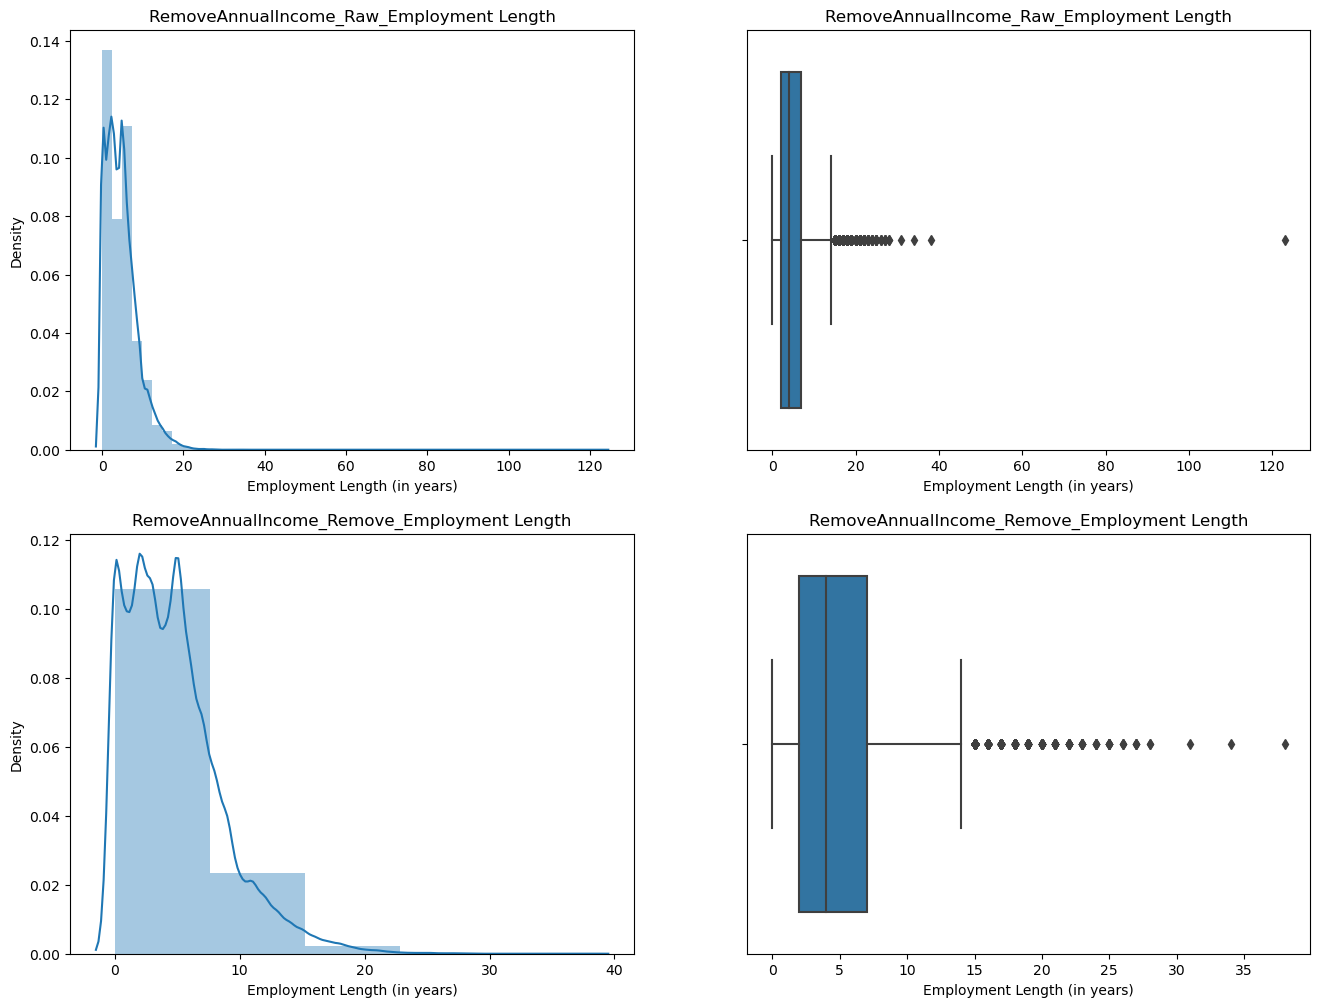

In [54]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.distplot(file_RemoveAnnualIncome['Employment Length (in years)']).set_title('RemoveAnnualIncome_Raw_Employment Length')
plt.subplot(2,2,2)
sns.boxplot(file_RemoveAnnualIncome['Employment Length (in years)']).set_title('RemoveAnnualIncome_Raw_Employment Length')

plt.subplot(2,2,3)
sns.distplot(file_RemoveEmploymentLength['Employment Length (in years)'], bins=5).set_title('RemoveAnnualIncome_Remove_Employment Length')
plt.subplot(2,2,4)
sns.boxplot(file_RemoveEmploymentLength['Employment Length (in years)']).set_title('RemoveAnnualIncome_Remove_Employment Length')
plt.show()

In [55]:
EmploymentLength_Before_After = pd.DataFrame([['EmploymentLength_Before', file_RemoveAnnualIncome.shape]],
                                   columns = ['Column', 'Shape'])


EmploymentLength_Remove = pd.DataFrame([['EmploymentLength_Remove', file_RemoveEmploymentLength.shape]],
                                   columns = ['Column', 'Shape'])

EmploymentLength_Before_After = EmploymentLength_Before_After.append(EmploymentLength_Remove, ignore_index = True)
EmploymentLength_Before_After


C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\472818247.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  EmploymentLength_Before_After = EmploymentLength_Before_After.append(EmploymentLength_Remove, ignore_index = True)


,Column,Shape
0,EmploymentLength_Before,"(27945, 12)"
1,EmploymentLength_Remove,"(27944, 12)"


#### Loan Amount---------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [56]:
# to make sure get the orginal file after remove Employment Length's outlier

file_RemoveEmploymentLength_to_LoanAmount = file_RemoveEmploymentLength.copy()

In [57]:
# find Loan amount's outlier

LoanAmountOutlier = find_outliers_IQR(file_RemoveEmploymentLength_to_LoanAmount['Loan Amount'])
print("number of outliers: "+ str(len(LoanAmountOutlier)))
print("max outlier value: "+ str(LoanAmountOutlier.max()))
print("min outlier value: "+ str(LoanAmountOutlier.min()))
LoanAmountOutlier

q1: 5000.0
q3: 12000.0
lower limit: -5500.0
upper limit: 22500.0

number of outliers: 1203
max outlier value: 35000
min outlier value: 22550


3        35000
4        35000
6        35000
7        35000
8        35000
         ...  
32301    35000
32302    35000
32315    24000
32316    24000
32524    30000
Name: Loan Amount, Length: 1203, dtype: int64

#### remove Loan Amount Outlier ----------------------------------------------------------------------------------------------------------------------------------------------

In [58]:
# to make sure get the orginal file after remove Employment Length's outlier

file_RemoveEmploymentLength_RemoveLoanAmount = file_RemoveEmploymentLength.copy()

In [59]:
file_RemoveLoanAmount = file_RemoveEmploymentLength_RemoveLoanAmount[~((file_RemoveEmploymentLength_RemoveLoanAmount['Loan Amount']<(-5500.0)) | (file_RemoveEmploymentLength_RemoveLoanAmount['Loan Amount']>(22500.0)))]
file_RemoveLoanAmount

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
9,10,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [60]:
file_RemoveLoanAmount.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income
count,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000
mean,15973.793426,27.477207,57035.130586,4.658315,8503.493699,10.916318,0.216933,0.167905
std,9291.557440,5.882702,26390.987824,3.861210,4903.270923,3.207482,0.412164,0.102683
min,2.000000,21.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000
25%,7822.000000,23.000000,36996.000000,2.000000,5000.000000,7.880000,0.000000,0.090000
50%,15791.000000,26.000000,52000.000000,4.000000,7500.000000,10.990000,0.000000,0.150000
75%,23911.000000,30.000000,72000.000000,7.000000,12000.000000,13.350000,0.000000,0.220000
max,32578.000000,60.000000,139380.000000,38.000000,22500.000000,23.220000,1.000000,0.830000


#### replace Loan Amount outlier --------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
# to make sure get the orginal file after remove Employment Length's outlier

file_RemoveEmploymentLength_ReplaceLoanAmount = file_RemoveEmploymentLength.copy()

In [62]:
mean = round(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'].mean())
mean

9261

In [63]:
percentile5 = round(np.percentile(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'], 5))
print('percentile_0.05 = ', percentile5)
percentile95 = round(np.percentile(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'], 95))
print('percentile_0.95 = ' , percentile95)

percentile_0.05 =  2000
percentile_0.95 =  21000


In [64]:
file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] = np.where(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] < -5500.0, percentile5, file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'])
file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] = np.where(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] > 22500.0, percentile95, file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'])
file_ReplaceLoanAmount = file_RemoveEmploymentLength_ReplaceLoanAmount
file_ReplaceLoanAmount

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,21000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,21000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [65]:
file_ReplaceLoanAmount.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income
count,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000
mean,16000.263956,27.498390,58336.022402,4.701689,9041.473125,10.997227,0.225845,0.174504
std,9324.042371,5.877253,27041.092575,3.884591,5425.926662,3.236158,0.418145,0.107172
min,2.000000,21.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000
25%,7887.750000,23.000000,37894.000000,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,15921.500000,26.000000,54000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,24007.250000,30.000000,75000.000000,7.000000,12000.000000,13.470000,0.000000,0.230000
max,32578.000000,60.000000,139380.000000,38.000000,22500.000000,23.220000,1.000000,0.830000


#### compare in visualization ----------------------------------------------------------------------------------------------------------------------------------------------------

In [66]:
# to make sure get the orginal file after remove Employment Length's outlier

file_RemoveEmploymentLength = file_RemoveEmploymentLength.copy()

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

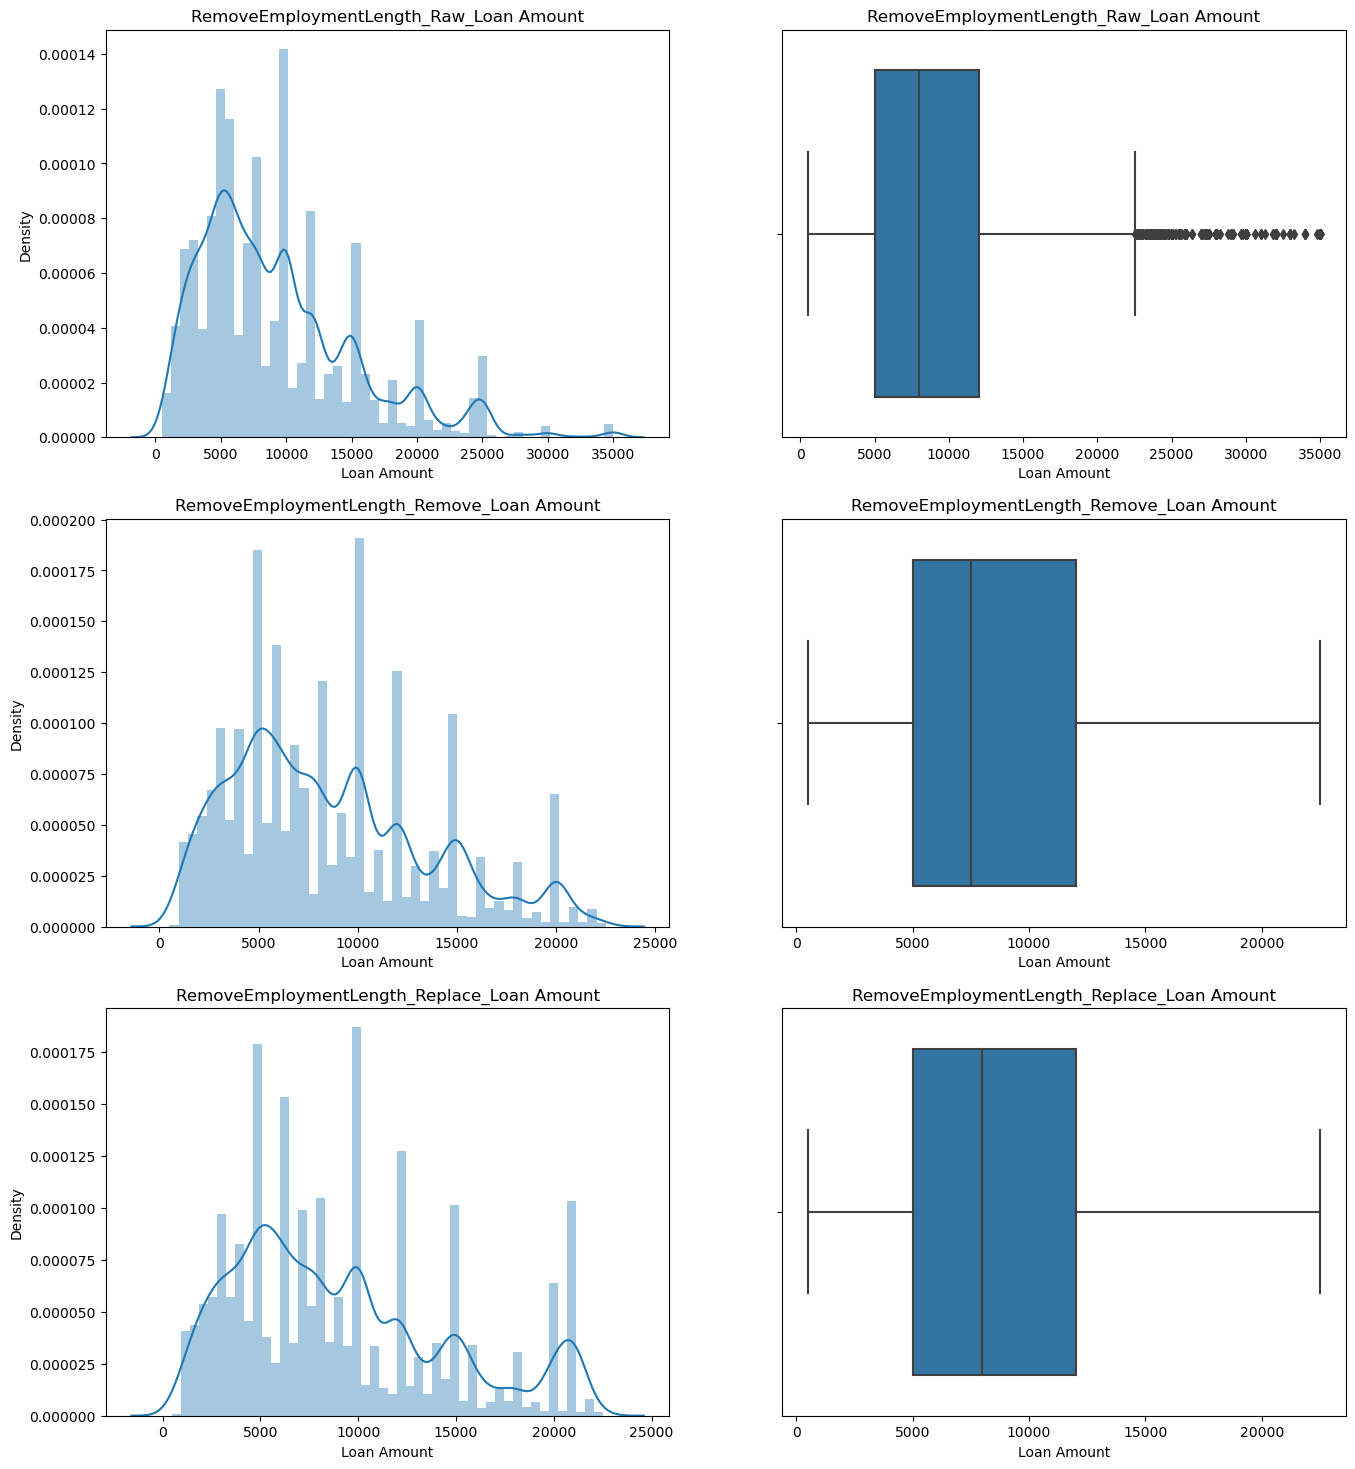

In [67]:
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.distplot(file_RemoveEmploymentLength['Loan Amount']).set_title('RemoveEmploymentLength_Raw_Loan Amount')
plt.subplot(3,2,2)
sns.boxplot(file_RemoveEmploymentLength['Loan Amount']).set_title('RemoveEmploymentLength_Raw_Loan Amount')

plt.subplot(3,2,3)
sns.distplot(file_RemoveLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Remove_Loan Amount')
plt.subplot(3,2,4)
sns.boxplot(file_RemoveLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Remove_Loan Amount')

plt.subplot(3,2,5)
sns.distplot(file_ReplaceLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Replace_Loan Amount')
plt.subplot(3,2,6)
sns.boxplot(file_ReplaceLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Replace_Loan Amount')
plt.show()

Mortage = Loan Amount / Annual Income 

Mortage have to < 28%

After remove Loan Amount outlier:  Mortage around 14%
    
After replace Loan Amount outlier: Mortage around 15% 
    
Getting a lower interest rate can save you money over time.

Conclusion: we plan to choose remoce Loan Amount 

Remove the Loan Amount looks more make sense 

#### check the shape of the file --------------------------------------------------------------------------------------------------------------------------------------------------
- to make sure we replace and remove work well

In [68]:
LoanAmount_Before_After = pd.DataFrame([['LoanAmount_Before', file_RemoveEmploymentLength.shape]],
                   columns = ['Column', 'Shape'])

LoanAmount_Remove = pd.DataFrame([['LoanAmount_Remove', file_RemoveLoanAmount.shape]],
                   columns = ['Column', 'Shape'])

LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Remove, ignore_index = True)

LoanAmount_Replace = pd.DataFrame([['LoanAmount_Replace', file_ReplaceLoanAmount.shape]],
                   columns = ['Column', 'Shape'])

LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Replace, ignore_index = True)
LoanAmount_Before_After

C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\3004435507.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Remove, ignore_index = True)
C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\3004435507.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Replace, ignore_index = True)


,Column,Shape
0,LoanAmount_Before,"(27944, 12)"
1,LoanAmount_Remove,"(26741, 12)"
2,LoanAmount_Replace,"(27944, 12)"


#### Interest rate-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [69]:
#follow the bank negara 

#### Percent Income ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [70]:
# to make sure get the original file after remove Loan Amount's outlier

file_RemoveLoanAmount_to_PercentIncome = file_RemoveLoanAmount.copy()

In [71]:
# Percent Income was same as (Loan Amount / Annual Income)
# recalculate percent income using the (new Loan Amount / new Annual Income)

file_RemoveLoanAmount_to_PercentIncome['Percent Income'] = round(file_RemoveLoanAmount_to_PercentIncome['Loan Amount'] / file_RemoveLoanAmount_to_PercentIncome['Annual Income'],2)
file_RecalculatePercentIncome = file_RemoveLoanAmount_to_PercentIncome
file_RecalculatePercentIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
9,10,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

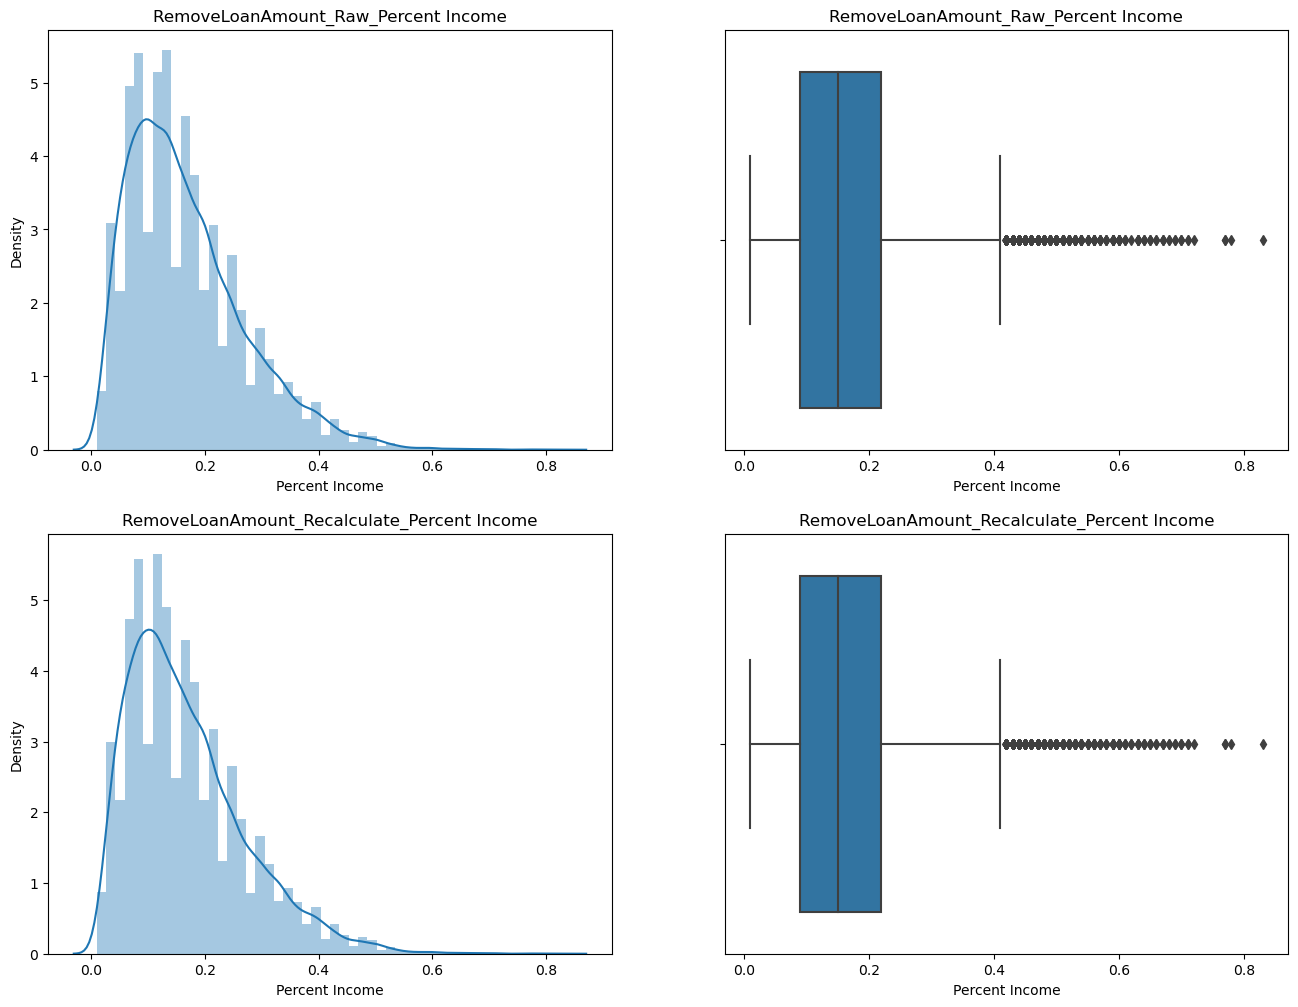

In [72]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.distplot(file_RemoveLoanAmount['Percent Income']).set_title('RemoveLoanAmount_Raw_Percent Income')
plt.subplot(2,2,2)
sns.boxplot(file_RemoveLoanAmount['Percent Income']).set_title('RemoveLoanAmount_Raw_Percent Income')

plt.subplot(2,2,3)
sns.distplot(file_RecalculatePercentIncome['Percent Income']).set_title('RemoveLoanAmount_Recalculate_Percent Income')
plt.subplot(2,2,4)
sns.boxplot(file_RecalculatePercentIncome['Percent Income']).set_title('RemoveLoanAmount_Recalculate_Percent Income')
plt.show()

#### Obeserve data using correlation dataset ------------------------------------------------------------------------------------------------------------------------------

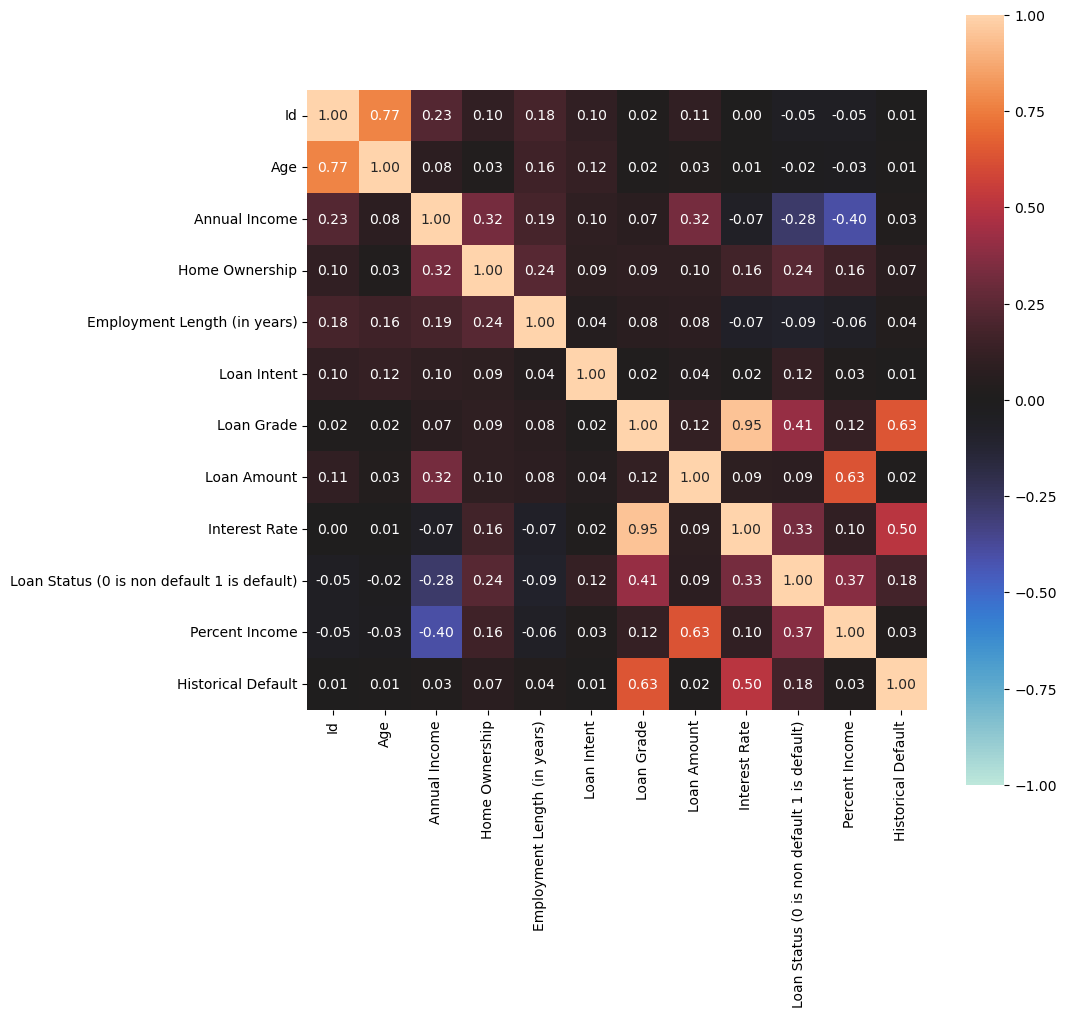

In [73]:
categorical_correlation= associations(file_RecalculatePercentIncome, filename= 'categorical_correlation2.png', figsize=(10,10))

In [74]:
# since Percent Income was calculated by using the Loan Amount and Annual Income 
# we have to observe and see which whether Percent Income or Loan Amount and Annual Income can be dropped.

file_drop_InterestRate = file_RecalculatePercentIncome.drop(['Interest Rate'],axis=1)
file_drop_InterestRate

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N
5,6,21,9900,OWN,2.0,VENTURE,A,2500,1,0.25,N
9,10,21,10000,OWN,6.0,VENTURE,D,1600,1,0.16,N
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,1,0.45,N
...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N


In [75]:
# since Percent Income was calculated by using the Loan Amount and Annual Income
# we have to observe and see which whether Percent Income or Loan Amount and Annual Income can be dropped.

file_drop_AnnualIncome_LoanAmount = file_drop_InterestRate.drop(['Loan Amount', 'Annual Income'],axis=1)
file_drop_AnnualIncome_LoanAmount

,Id,Age,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,OWN,5.0,EDUCATION,B,0,0.10,N
2,3,25,MORTGAGE,1.0,MEDICAL,C,1,0.57,N
5,6,21,OWN,2.0,VENTURE,A,1,0.25,N
9,10,21,OWN,6.0,VENTURE,D,1,0.16,N
11,12,21,OWN,2.0,HOMEIMPROVEMENT,A,1,0.45,N
...,...,...,...,...,...,...,...,...,...
32573,32574,56,MORTGAGE,0.0,PERSONAL,A,0,0.08,N
32574,32575,52,RENT,4.0,PERSONAL,D,1,0.31,Y
32575,32576,52,RENT,0.0,EDUCATION,B,0,0.08,N
32576,32577,57,MORTGAGE,1.0,PERSONAL,C,0,0.11,N


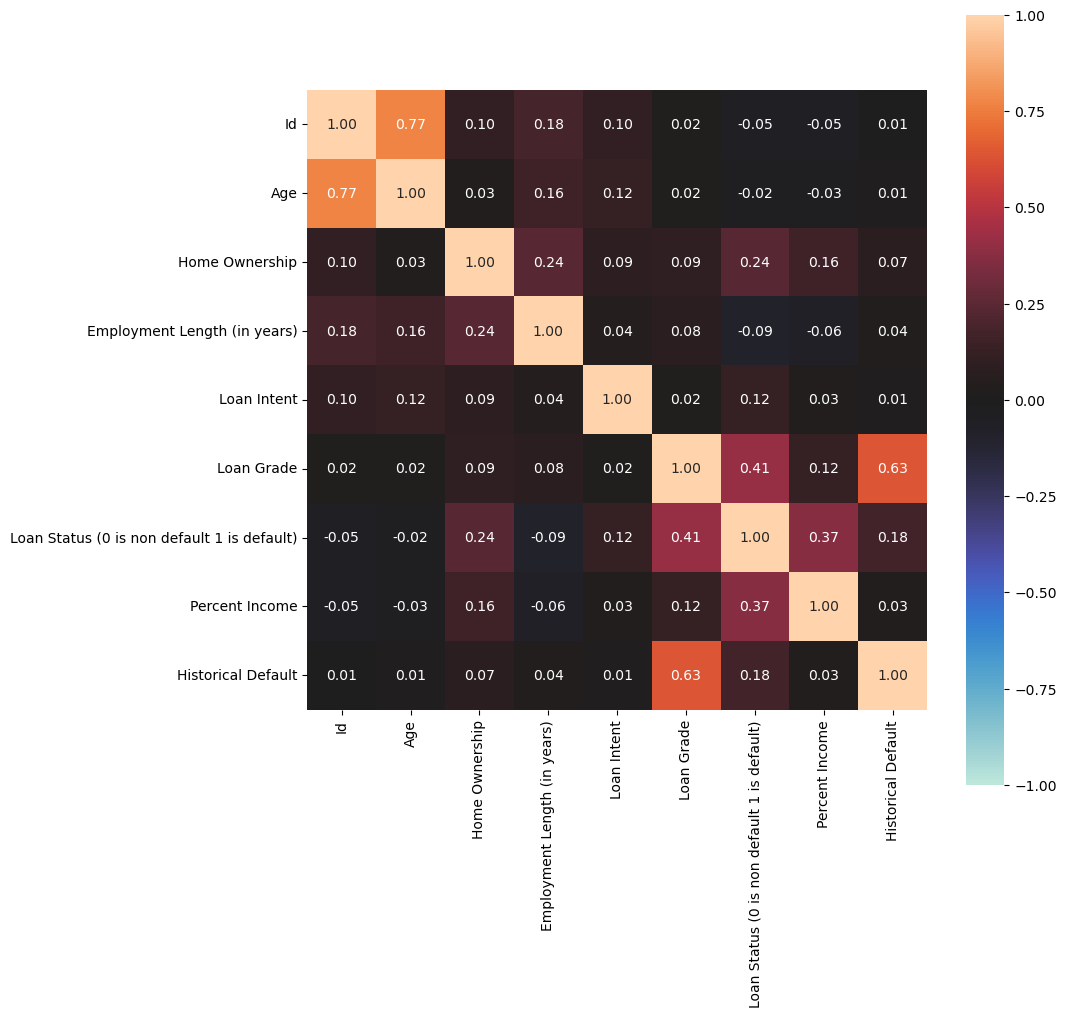

In [76]:
# observe the data again, to check whether there is still highly correlated variable 

categorical_correlation= associations(file_drop_AnnualIncome_LoanAmount, filename= 'categorical_correlation3.png', figsize=(10,10))

#### Final Clean file ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [77]:
file_FinalClean = file_drop_AnnualIncome_LoanAmount
file_FinalClean

,Id,Age,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,OWN,5.0,EDUCATION,B,0,0.10,N
2,3,25,MORTGAGE,1.0,MEDICAL,C,1,0.57,N
5,6,21,OWN,2.0,VENTURE,A,1,0.25,N
9,10,21,OWN,6.0,VENTURE,D,1,0.16,N
11,12,21,OWN,2.0,HOMEIMPROVEMENT,A,1,0.45,N
...,...,...,...,...,...,...,...,...,...
32573,32574,56,MORTGAGE,0.0,PERSONAL,A,0,0.08,N
32574,32575,52,RENT,4.0,PERSONAL,D,1,0.31,Y
32575,32576,52,RENT,0.0,EDUCATION,B,0,0.08,N
32576,32577,57,MORTGAGE,1.0,PERSONAL,C,0,0.11,N


# Feature Engineering

In feature engineering, we apply domain expertise to produce new features from raw data, or we convert or encode features. We’ll encode categorical features or make dummy features out of them in this section.

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

- we can use label encoding or dummy variable 
- but label encoding have to used in ranking 

In [78]:
# check the datatype of the variables 
# find those object datatype to tranform to dummy variable

file_FinalClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 1 to 32577
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           26741 non-null  int64  
 1   Age                                          26741 non-null  int64  
 2   Home Ownership                               26741 non-null  object 
 3   Employment Length (in years)                 26741 non-null  float64
 4   Loan Intent                                  26741 non-null  object 
 5   Loan Grade                                   26741 non-null  object 
 6   Loan Status (0 is non default 1 is default)  26741 non-null  int64  
 7   Percent Income                               26741 non-null  float64
 8   Historical Default                           26741 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [79]:
# list of columns
cols = file_FinalClean.select_dtypes(['object']).columns

# Create dummy variables

file_FinalClean_Dummy = pd.get_dummies(file_FinalClean[cols])
file_FinalClean_Dummy

,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Loan Intent_DEBTCONSOLIDATION,Loan Intent_EDUCATION,Loan Intent_HOMEIMPROVEMENT,Loan Intent_MEDICAL,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_N,Historical Default_Y
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
11,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
32574,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
32575,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
32576,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [80]:
# check the datatype agn to make sure there is no more object datatyype

file_FinalClean_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 1 to 32577
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Home Ownership_MORTGAGE        26741 non-null  uint8
 1   Home Ownership_OTHER           26741 non-null  uint8
 2   Home Ownership_OWN             26741 non-null  uint8
 3   Home Ownership_RENT            26741 non-null  uint8
 4   Loan Intent_DEBTCONSOLIDATION  26741 non-null  uint8
 5   Loan Intent_EDUCATION          26741 non-null  uint8
 6   Loan Intent_HOMEIMPROVEMENT    26741 non-null  uint8
 7   Loan Intent_MEDICAL            26741 non-null  uint8
 8   Loan Intent_PERSONAL           26741 non-null  uint8
 9   Loan Intent_VENTURE            26741 non-null  uint8
 10  Loan Grade_A                   26741 non-null  uint8
 11  Loan Grade_B                   26741 non-null  uint8
 12  Loan Grade_C                   26741 non-null  uint8
 13  Loan Grade_D    

In [81]:
# concat dummy columns with original final dataframe

file_FinalClean_Dummy = pd.concat([file_FinalClean,file_FinalClean_Dummy],axis=1)
file_FinalClean_Dummy

,Id,Age,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Status (0 is non default 1 is default),Percent Income,Historical Default,Home Ownership_MORTGAGE,...,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_N,Historical Default_Y
1,2,21,OWN,5.0,EDUCATION,B,0,0.10,N,0,...,0,0,1,0,0,0,0,0,1,0
2,3,25,MORTGAGE,1.0,MEDICAL,C,1,0.57,N,1,...,0,0,0,1,0,0,0,0,1,0
5,6,21,OWN,2.0,VENTURE,A,1,0.25,N,0,...,1,1,0,0,0,0,0,0,1,0
9,10,21,OWN,6.0,VENTURE,D,1,0.16,N,0,...,1,0,0,0,1,0,0,0,1,0
11,12,21,OWN,2.0,HOMEIMPROVEMENT,A,1,0.45,N,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,MORTGAGE,0.0,PERSONAL,A,0,0.08,N,1,...,0,1,0,0,0,0,0,0,1,0
32574,32575,52,RENT,4.0,PERSONAL,D,1,0.31,Y,0,...,0,0,0,0,1,0,0,0,0,1
32575,32576,52,RENT,0.0,EDUCATION,B,0,0.08,N,0,...,0,0,1,0,0,0,0,0,1,0
32576,32577,57,MORTGAGE,1.0,PERSONAL,C,0,0.11,N,1,...,0,0,0,1,0,0,0,0,1,0


In [82]:
# drop original cols and left those dummy cols 

file_FinalClean_Dummy = file_FinalClean_Dummy.drop(cols,axis=1)
file_FinalClean_Dummy

,Id,Age,Employment Length (in years),Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Loan Intent_DEBTCONSOLIDATION,...,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_N,Historical Default_Y
1,2,21,5.0,0,0.10,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,25,1.0,1,0.57,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,6,21,2.0,1,0.25,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9,10,21,6.0,1,0.16,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
11,12,21,2.0,1,0.45,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,0.0,0,0.08,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
32574,32575,52,4.0,1,0.31,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
32575,32576,52,0.0,0,0.08,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
32576,32577,57,1.0,0,0.11,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [83]:
# remove the column of Historical default_N since Historical Default was binary variable, we use one of it will do

file_FinalDummy = file_FinalClean_Dummy.drop(['Historical Default_N'], axis=1)
file_FinalDummy

,Id,Age,Employment Length (in years),Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Loan Intent_DEBTCONSOLIDATION,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
1,2,21,5.0,0,0.10,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,25,1.0,1,0.57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,6,21,2.0,1,0.25,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
9,10,21,6.0,1,0.16,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
11,12,21,2.0,1,0.45,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,0.0,0,0.08,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
32574,32575,52,4.0,1,0.31,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
32575,32576,52,0.0,0,0.08,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
32576,32577,57,1.0,0,0.11,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [84]:
# check agn all the variable 

file_FinalDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 1 to 32577
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           26741 non-null  int64  
 1   Age                                          26741 non-null  int64  
 2   Employment Length (in years)                 26741 non-null  float64
 3   Loan Status (0 is non default 1 is default)  26741 non-null  int64  
 4   Percent Income                               26741 non-null  float64
 5   Home Ownership_MORTGAGE                      26741 non-null  uint8  
 6   Home Ownership_OTHER                         26741 non-null  uint8  
 7   Home Ownership_OWN                           26741 non-null  uint8  
 8   Home Ownership_RENT                          26741 non-null  uint8  
 9   Loan Intent_DEBTCONSOLIDATION                26741 non-null  uint8  
 10

In [85]:
# check the file 

file_FinalDummy

,Id,Age,Employment Length (in years),Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Loan Intent_DEBTCONSOLIDATION,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
1,2,21,5.0,0,0.10,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,25,1.0,1,0.57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,6,21,2.0,1,0.25,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
9,10,21,6.0,1,0.16,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
11,12,21,2.0,1,0.45,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,0.0,0,0.08,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
32574,32575,52,4.0,1,0.31,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
32575,32576,52,0.0,0,0.08,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
32576,32577,57,1.0,0,0.11,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# Remove ID

- since ID will not give any predictive function and we already clean all the data that we can, we have to remove ID so that our data will not affect by ID

In [86]:
file_Ready_Model = file_FinalDummy.drop(['Id'],axis=1)
file_Ready_Model

,Age,Employment Length (in years),Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Loan Intent_DEBTCONSOLIDATION,Loan Intent_EDUCATION,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
1,21,5.0,0,0.10,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,1.0,1,0.57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,21,2.0,1,0.25,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
9,21,6.0,1,0.16,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
11,21,2.0,1,0.45,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,56,0.0,0,0.08,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
32574,52,4.0,1,0.31,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
32575,52,0.0,0,0.08,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
32576,57,1.0,0,0.11,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# Split data into Train-Test

In [87]:
# split data into dependent variables(X) and independent variable(y) that we would predict

X = file_Ready_Model.drop(['Loan Status (0 is non default 1 is default)'], axis=1)
y = file_Ready_Model['Loan Status (0 is non default 1 is default)']

# Let’s split X and y using Train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

# get shape of train and test data

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)


train size X :  (21392, 21)
train size y :  (21392,)
test size X :  (5349, 21)
test size y :  (5349,)


# Feature Scaling

- used when we have features that vary greatly in magnitude, the algorithm assumes that features with a large magnitude are more relevant than those with a small magnitude.

In [88]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

The fit method of StandardScaler is used to estimate sample mean and standard deviation for each feature using training data. The transform method is then used to estimate the standardized value of features using those estimated parameters (mean & standard deviation).

In [89]:
# convert data from array to dataframe

X_train = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test = pd.DataFrame(X_test_std, columns = X_test.columns)

# Logistic Regression (full model)

In [90]:
# train model to learn relationships between input and output variables

lr_DefaultModel = LogisticRegression(random_state=0)
lr_DefaultModel = lr_DefaultModel.fit(X_train,y_train)

y_pred_train = lr_DefaultModel.predict(X_train)
y_pred_test = lr_DefaultModel.predict(X_test)

- After training our model on the training dataset, we used our model to predict values for the test dataset and recorded them in the y_pred_basemodel variable.

# Formula of Logistic Regression 

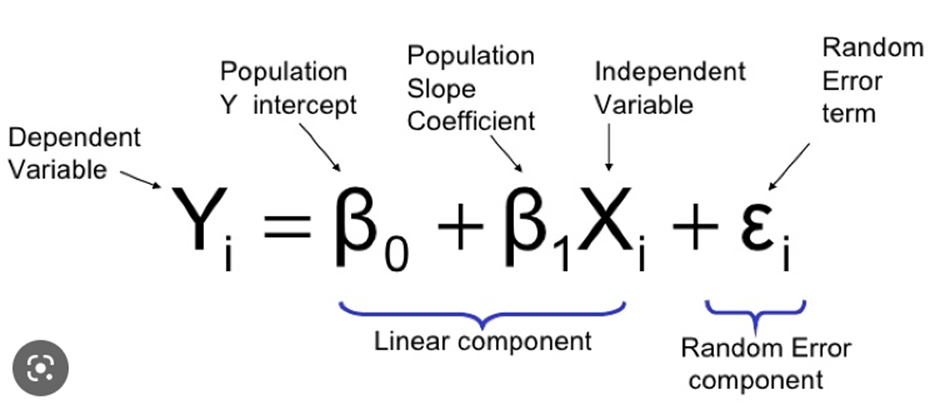

- since our dependent variable is binary variable: 0 and 1
- it consider as classification problem
- Error is not possible to used in classification problem since it is not convex, continuous or diffrentiable. 

In [91]:
# Intercept of the model

Intercept = str(lr_DefaultModel.intercept_) + "(Intercept)"
print(Intercept)

[-1.87934362](Intercept)


In [92]:
# coeeficient

print(lr_DefaultModel.coef_)

[[-0.06978777 -0.13141199  1.00804857 -0.12823742  0.00566179 -0.43338649
   0.36181271  0.16114807 -0.13100124  0.17273093  0.11146531 -0.03295579
  -0.24003743 -0.34995354 -0.20368651 -0.04394086  0.6412111   0.36127988
   0.18574128  0.19800158  0.01487849]]


In [93]:
colNameInFileReadyModel = file_Ready_Model.drop(['Loan Status (0 is non default 1 is default)'], axis=1)
colNameInFileReadyModel = list(colNameInFileReadyModel.columns)
print(colNameInFileReadyModel)
print("\nTotal length of list:" , len(colNameInFileReadyModel))

['Age', 'Employment Length (in years)', 'Percent Income', 'Home Ownership_MORTGAGE', 'Home Ownership_OTHER', 'Home Ownership_OWN', 'Home Ownership_RENT', 'Loan Intent_DEBTCONSOLIDATION', 'Loan Intent_EDUCATION', 'Loan Intent_HOMEIMPROVEMENT', 'Loan Intent_MEDICAL', 'Loan Intent_PERSONAL', 'Loan Intent_VENTURE', 'Loan Grade_A', 'Loan Grade_B', 'Loan Grade_C', 'Loan Grade_D', 'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G', 'Historical Default_Y']

Total length of list: 21


In [94]:
# y = intercept + coeficient 

print("Logistic Regression Formula: \n", " ", Intercept )
for p in range(0, 21):
    print(" + [" + str(lr_DefaultModel.coef_[0][p]) +"]" + " (" + str(colNameInFileReadyModel[p]) + ")")
    p = p+1

Logistic Regression Formula: 
   [-1.87934362](Intercept)
 + [-0.06978776594524988] (Age)
 + [-0.13141199406660245] (Employment Length (in years))
 + [1.008048566736075] (Percent Income)
 + [-0.1282374207702666] (Home Ownership_MORTGAGE)
 + [0.005661789356064517] (Home Ownership_OTHER)
 + [-0.43338648654544737] (Home Ownership_OWN)
 + [0.36181270869548315] (Home Ownership_RENT)
 + [0.16114807319856647] (Loan Intent_DEBTCONSOLIDATION)
 + [-0.13100123839989442] (Loan Intent_EDUCATION)
 + [0.17273092987087652] (Loan Intent_HOMEIMPROVEMENT)
 + [0.11146530900484425] (Loan Intent_MEDICAL)
 + [-0.03295578642445626] (Loan Intent_PERSONAL)
 + [-0.24003743201105898] (Loan Intent_VENTURE)
 + [-0.3499535386341922] (Loan Grade_A)
 + [-0.2036865105420604] (Loan Grade_B)
 + [-0.043940859442168294] (Loan Grade_C)
 + [0.6412110991019835] (Loan Grade_D)
 + [0.36127988299687525] (Loan Grade_E)
 + [0.185741275528186] (Loan Grade_F)
 + [0.19800158407593854] (Loan Grade_G)
 + [0.014878493843965003] (Histori

# Model Evaluation Metrics

### Train data for full model ---------------------------------------------------------------------------------------------------------------------------

In [95]:
# confusion matrix for train data

TrainConfusionMatrix = confusion_matrix(y_train,y_pred_train)
TrainConfusionMatrix

array([[16030,   724],
       [ 2133,  2505]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


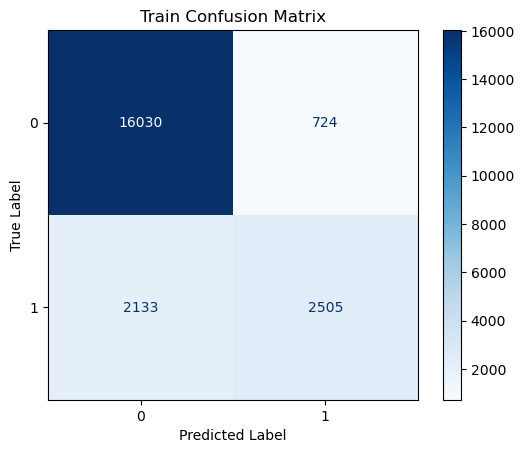

In [96]:
# plot the confusion matrix for train data 

color = 'black'
matrix = plot_confusion_matrix(lr_DefaultModel, X_train, y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Train Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#### Classification report for Train data --------------------------------------------------------------------------------------------------------------------------------------

In [97]:
# Run the classification report for train data

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     16754
           1       0.78      0.54      0.64      4638

    accuracy                           0.87     21392
   macro avg       0.83      0.75      0.78     21392
weighted avg       0.86      0.87      0.86     21392



In [98]:
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

results = pd.DataFrame([['Logistic Regression (Lasso) Train', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837


#### ROC curve for Train data-----------------------------------------------------------------------------------------------------------------------------------------------------

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


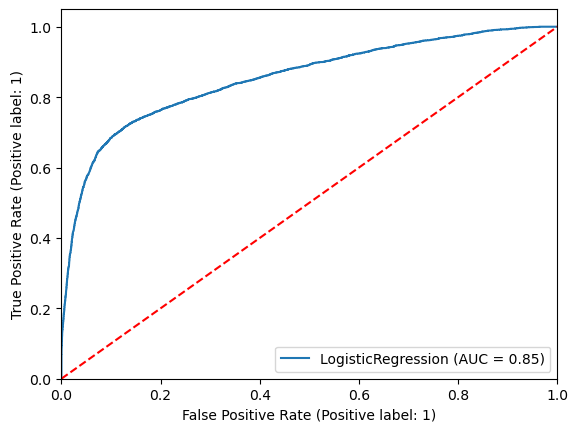

In [99]:
# ROC curve for train data

metrics.plot_roc_curve(lr_DefaultModel, X_train, y_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

### Test data for full model ----------------------------------------------------------------------------------------------------------------------------

In [100]:
# confusion matrix for test data

ConfusionMatrix = confusion_matrix(y_test,y_pred_test)
ConfusionMatrix

array([[3995,  191],
       [ 550,  613]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


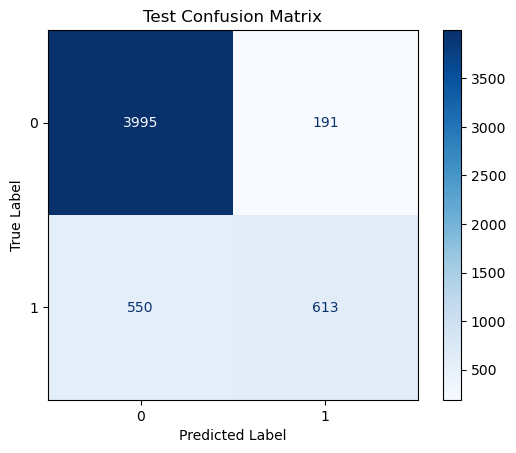

In [101]:
# plot the confusion matrix for test data 

color = 'black'
matrix = plot_confusion_matrix(lr_DefaultModel, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#### Classification report for Test data ----------------------------------------------------------------------------------------------------------------------------------------

In [102]:
# Run the classification report for test data

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4186
           1       0.76      0.53      0.62      1163

    accuracy                           0.86      5349
   macro avg       0.82      0.74      0.77      5349
weighted avg       0.85      0.86      0.85      5349



In [103]:
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

resultsTest = pd.DataFrame([['Logistic Regression (Lasso) Test', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsTest, ignore_index = True)
results

C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\3832889150.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsTest, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837
1,Logistic Regression (Lasso) Test,0.861469,0.762438,0.527085,0.623284


#### ROC curve for Test data------------------------------------------------------------------------------------------------------------------------------------------------------

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


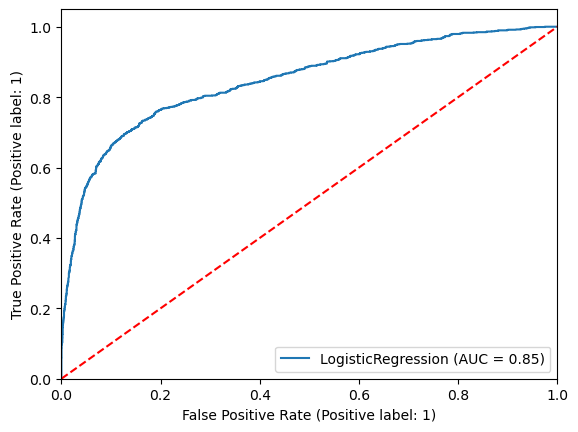

In [104]:
# ROC curve for test data

metrics.plot_roc_curve(lr_DefaultModel, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

- since the classification report for train and test is about the same, our calculation is consider correct because we devide data into train and test just to validate we do the right thing 

#############################################################################################################################

# Weighted Logistic Regression

Since our model is class imbalance as mentioned earier, we have to do one more step before we run Logistic Regression

In case be unbalanced label distribution, the best practice for weights is to use the inverse of the label distribution. In our set, label distribution is 1:99 so we can specify weights as inverse of label distribution. For majority class, will use weight of 1 and for minority class, will use weight of 99. So the penalty of wrong prediction of minority class would be 99 times more severe than wrong prediction of majority class. Moreover, with this class-weight values, we would expect our model to perform better then the default one i.e. previous model.

To specify weights we will make use of class_weight hyperparameter of Logistic-regression. The class_weight hyperparameter is a dictionary that defines weight of each label. Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have same weight value.

In [105]:
# define class weights

w = {0:22, 1:78}
lr2_DefaultModel = LogisticRegression(random_state=0, class_weight=w)
lr2_DefaultModel.fit(X_train,y_train)

y_pred_train2= lr2_DefaultModel.predict(X_train)
y_pred_test2 = lr2_DefaultModel.predict(X_test)

# Model Evaluation Metrics

### Train data for weighted model -------------------------------------------------------------------------------------------------------------------

In [106]:
# confusion matrix for train data

TrainConfusionMatrix = confusion_matrix(y_train,y_pred_train2)
TrainConfusionMatrix

array([[13627,  3127],
       [ 1130,  3508]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


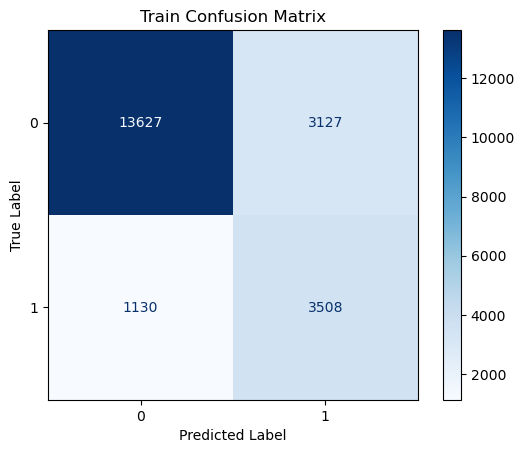

In [107]:
# plot the confusion matrix for train data 

color = 'black'
matrix = plot_confusion_matrix(lr2_DefaultModel, X_train, y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Train Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#### Classification report for Train data --------------------------------------------------------------------------------------------------------------------------------------

In [108]:
# Run the classification report for train data

print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     16754
           1       0.53      0.76      0.62      4638

    accuracy                           0.80     21392
   macro avg       0.73      0.78      0.74     21392
weighted avg       0.84      0.80      0.81     21392



In [109]:
acc = accuracy_score(y_train, y_pred_train2)
prec = precision_score(y_train, y_pred_train2)
rec = recall_score(y_train, y_pred_train2)
f1 = f1_score(y_train, y_pred_train2)

resultsWeightedTrain = pd.DataFrame([['Weighted Logistic Regression (Lasso) RFE Train', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsWeightedTrain, ignore_index = True)
results

C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\463432391.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsWeightedTrain, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837
1,Logistic Regression (Lasso) Test,0.861469,0.762438,0.527085,0.623284
2,Weighted Logistic Regression (Lasso) RFE Train,0.801000,0.528711,0.756361,0.622372


#### ROC curve for Train data-----------------------------------------------------------------------------------------------------------------------------------------------------

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


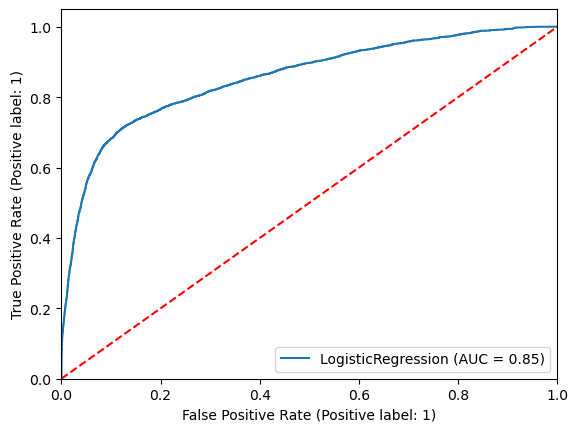

In [110]:
# ROC curve for train data

metrics.plot_roc_curve(lr2_DefaultModel, X_train, y_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

### Test data for weighted model --------------------------------------------------------------------------------------------------------------------

In [111]:
# confusion matrix for test data

ConfusionMatrix = confusion_matrix(y_test,y_pred_test2)
ConfusionMatrix

array([[3401,  785],
       [ 280,  883]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


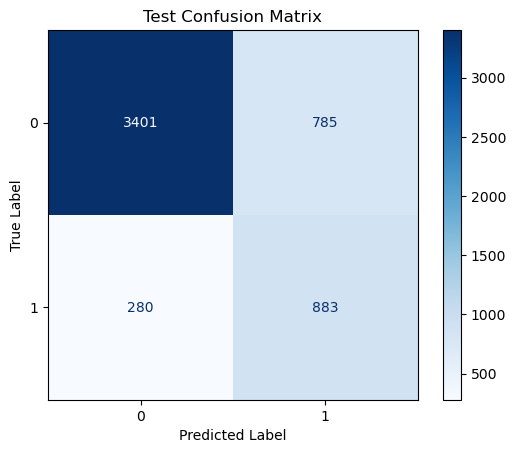

In [112]:
# plot the confusion matrix for test data 

color = 'black'
matrix = plot_confusion_matrix(lr2_DefaultModel, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

#### Classification report for Test data ----------------------------------------------------------------------------------------------------------------------------------------

In [113]:
# Run the classification report for test data

print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      4186
           1       0.53      0.76      0.62      1163

    accuracy                           0.80      5349
   macro avg       0.73      0.79      0.74      5349
weighted avg       0.84      0.80      0.81      5349



In [114]:
acc = accuracy_score(y_test, y_pred_test2)
prec = precision_score(y_test, y_pred_test2)
rec = recall_score(y_test, y_pred_test2)
f1 = f1_score(y_test, y_pred_test2)

resultsWeightedTest = pd.DataFrame([['Weighted Logistic Regression (Lasso) RFE Test', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsWeightedTest, ignore_index = True)
results

C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\4009488530.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsWeightedTest, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837
1,Logistic Regression (Lasso) Test,0.861469,0.762438,0.527085,0.623284
2,Weighted Logistic Regression (Lasso) RFE Train,0.801000,0.528711,0.756361,0.622372
3,Weighted Logistic Regression (Lasso) RFE Test,0.800897,0.529376,0.759243,0.623808


#### ROC curve for Test data------------------------------------------------------------------------------------------------------------------------------------------------------

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


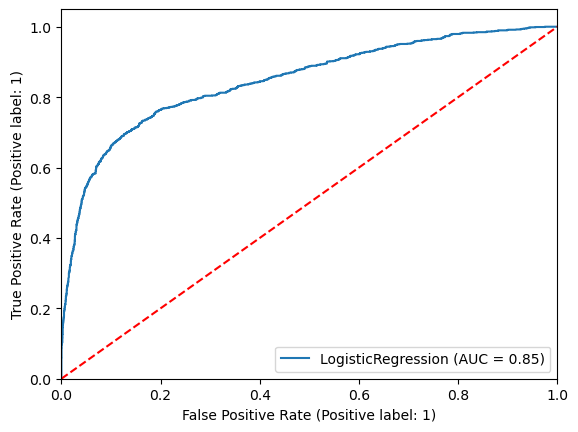

In [115]:
# ROC curve for test data

metrics.plot_roc_curve(lr_DefaultModel, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

From the classification report, we clearly see that the accuracy for full model's training and testing data is higher than the weighted model's training and testing data.

We can perform goodness of fit to see which model is the best model.

# Diagnostics / Goodness of Fit (Weighted Logistic Regression)

- Is the model any good? 
- How well does the model fit the data? 
- Which predictors are most important? Are the predictions accurate?
- how well a model fits a given set of data, or how well it will predict a future set of observations.

### Log Loss Ratio Test ---------------------------------------------------------------------------------------------------------------------------------
- Log loss, aka logistic loss or cross-entropy loss.

- This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels. 

- The log-likelihood was represent the higher the log-likelihood, the better a model fits a dataset.
- However, since the Log loss functions defined as the negative log-likelihood, means the lower the log-loss, the better the performance of the model.

In [116]:
# calculate the log-likelihood of the model for full model 

full_LogLoss = log_loss(y_test, y_pred_test)
print("Full model's log-loss: ", full_LogLoss)

Full model's log-loss:  4.784704810569823


In [117]:
# calculate the log-likelihood of the model for weighted model 

Weighted_LogLoss = log_loss(y_test,y_pred_test2)
print("Weighted model's log-loss: ", Weighted_LogLoss)

Weighted model's log-loss:  6.876878770716505


In [118]:
# Perform the Log-Likelihood Test

# calculate likelihood ratio Chi-Squared test statistic

LikelossRatio_statistic_Weighted = -2*(Weighted_LogLoss-full_LogLoss)
print("Chi-Squared test-statistic: ", LikelossRatio_statistic_Weighted)

# calculate p-value of test statistic using 2 degrees of freedom

p_value_Weighted = scipy.stats.chi2.sf(LikelossRatio_statistic_Weighted, 2)

# We used 2 degrees of freedom when calculating the p-value 
# because this represented the difference between the total predictor variables used between the two models.

print("P-value: ", p_value_Weighted)

Chi-Squared test-statistic:  -4.184347920293364
P-value:  1.0


H0 = The full model and the RFE model fit the data equally well

H1 = The full model and the RFE model fit the data are different


Since p-value > 0.05, we do not reject H0 and conclude that the full model and the RFE model fit the data equally well.

Besides, the lower the log-loss, the better the performance of the model.

Hence, we should use the full model as the log-loss in full model is lower than log loss in weighted model.

### Psuedo R^2 --------------------------------------------------------------------------------------------------------------------------------------------

- In ordinary least square (OLS) regression, the R Square statistics measures the amount of variance explained by the regression model. The value of R Square ranges in 0 and 1, with a larger value indicating more variance is explained by the model (higher value is better). 

In [119]:
# Efron’s R^2

def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

In [120]:
full_EfronR2 = efron_rsquare(y_test, y_pred_test)
print("Full model's Efron's R Square: ", full_EfronR2)

Full model's Efron's R Square:  0.18583605261611924


In [121]:
Weighted_EfronR2 = efron_rsquare(y_test,y_pred_test2)
print("Weighted model's Efron's R Square: ", Weighted_EfronR2)

Weighted model's Efron's R Square:  -0.17015466121974754


The measure ranges from 0 to just under 1, with values closer to zero indicating that the model has no predictive power.

Hence, the higher pseudo R-squared indicates which model better predicts the outcome. 

Hence, we should use the full model  from the performance of R Square because the R Squared in full model is higher than the R Squared in RFE model.

- we found that our full model is better than weighted logistic regression model

- we can still improve our model by using feature selection

#############################################################################################################################

# Feature Selection (Recursive Feature Elimination)

- which factor is the best to select, then only run logistic regression
- Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [122]:
rfe = RFE(lr_DefaultModel, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

# Summarize the selection of the attributes

print(rfe.support_)
print(rfe.ranking_)
rfeCol = X_train.columns[rfe.support_]
print("\nColumns selected: ", rfeCol)
print("\nTotal columns selected: ", rfe.n_features_)

[False False  True  True False  True  True  True False  True  True False
 False  True False False  True  True False False False]
[ 8  6  1  1 12  1  1  1  7  1  1 10  5  1  4  9  1  1  2  3 11]

Columns selected:  Index(['Percent Income', 'Home Ownership_MORTGAGE', 'Home Ownership_OWN',
       'Home Ownership_RENT', 'Loan Intent_DEBTCONSOLIDATION',
       'Loan Intent_HOMEIMPROVEMENT', 'Loan Intent_MEDICAL', 'Loan Grade_A',
       'Loan Grade_D', 'Loan Grade_E'],
      dtype='object')

Total columns selected:  10


In [123]:
# Fitting Model to the Training Set

lr_RFEModel = LogisticRegression(random_state=0)
X_trainRFE = X_train[rfeCol]
X_testRFE = X_test[rfeCol]
lr_RFEModel.fit(X_trainRFE, y_train)

# Predicting Test Set

y_pred_rfe_train = lr_RFEModel.predict(X_trainRFE)
y_pred_rfe_test = lr_RFEModel.predict(X_testRFE)

# Model Evaluation Metrics

### Train data for RFE model --------------------------------------------------------------------------------------------------------------------------

In [124]:
# RFE confusion matrix for train data 

RFETrainConfusionMatrix = confusion_matrix(y_train,y_pred_rfe_train)
RFETrainConfusionMatrix

array([[16022,   732],
       [ 2201,  2437]], dtype=int64)

In [125]:
# Run the classification report 

print(classification_report(y_train,y_pred_rfe_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     16754
           1       0.77      0.53      0.62      4638

    accuracy                           0.86     21392
   macro avg       0.82      0.74      0.77     21392
weighted avg       0.86      0.86      0.85     21392



In [126]:
acc = accuracy_score(y_train,y_pred_rfe_train)
prec = precision_score(y_train,y_pred_rfe_train)
rec = recall_score(y_train,y_pred_rfe_train)
f1 = f1_score(y_train,y_pred_rfe_train)

resultsRFETrain = pd.DataFrame([['Logistic Regression (Lasso) RFE Train', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFETrain, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\1783447671.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFETrain, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837
1,Logistic Regression (Lasso) Test,0.861469,0.762438,0.527085,0.623284
2,Weighted Logistic Regression (Lasso) RFE Train,0.801000,0.528711,0.756361,0.622372
3,Weighted Logistic Regression (Lasso) RFE Test,0.800897,0.529376,0.759243,0.623808
4,Logistic Regression (Lasso) RFE Train,0.862893,0.769012,0.525442,0.624312


### Train data for RFE model --------------------------------------------------------------------------------------------------------------------------

In [127]:
# RFE confusion matrix for test data 

RFETestConfusionMatrix = confusion_matrix(y_test,y_pred_rfe_test)
RFETestConfusionMatrix

array([[3996,  190],
       [ 567,  596]], dtype=int64)

In [128]:
# Run the classification report 

print(classification_report(y_test,y_pred_rfe_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4186
           1       0.76      0.51      0.61      1163

    accuracy                           0.86      5349
   macro avg       0.82      0.73      0.76      5349
weighted avg       0.85      0.86      0.85      5349



In [129]:
acc = accuracy_score(y_test,y_pred_rfe_test)
prec = precision_score(y_test,y_pred_rfe_test)
rec = recall_score(y_test,y_pred_rfe_test)
f1 = f1_score(y_test,y_pred_rfe_test)

resultsRFETest = pd.DataFrame([['Logistic Regression (Lasso) RFE Test', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFETest, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\4207745275.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFETest, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837
1,Logistic Regression (Lasso) Test,0.861469,0.762438,0.527085,0.623284
2,Weighted Logistic Regression (Lasso) RFE Train,0.801000,0.528711,0.756361,0.622372
3,Weighted Logistic Regression (Lasso) RFE Test,0.800897,0.529376,0.759243,0.623808
4,Logistic Regression (Lasso) RFE Train,0.862893,0.769012,0.525442,0.624312
5,Logistic Regression (Lasso) RFE Test,0.858478,0.758270,0.512468,0.611596


From the classification report, we clearly see that the accuracy for full model's training and testing data is higher than the RFE model's training and testing data. 

We can perform goodness of fit to see which model is the best model.

# Diagnostics / Goodness of Fit (RFE)

### Log Loss Ratio Test ---------------------------------------------------------------------------------------------------------------------------------


In [130]:
# calculate the log-likelihood of the model for full model 

full_LogLoss = log_loss(y_test, y_pred_test)
print("Full model's log-loss: ", full_LogLoss)

Full model's log-loss:  4.784704810569823


In [131]:
# calculate the log-likelihood of the model for RFE model 

RFE_LogLoss = log_loss(y_test,y_pred_rfe_test)
print("RFE model's log-loss: ", RFE_LogLoss)

RFE model's log-loss:  4.888017508779047


In [132]:
# Perform the Log-Likelihood Test

# calculate likelihood ratio Chi-Squared test statistic

LikelossRatio_statistic_RFE = -2*(RFE_LogLoss-full_LogLoss)
print("Chi-Squared test-statistic: ", LikelossRatio_statistic_RFE)

# calculate p-value of test statistic using 2 degrees of freedom

p_value_RFE = scipy.stats.chi2.sf(LikelossRatio_statistic_RFE, 2)

# We used 2 degrees of freedom when calculating the p-value 
# because this represented the difference between the total predictor variables used between the two models.

print("P-value: ", p_value_RFE)

Chi-Squared test-statistic:  -0.20662539641844724
P-value:  1.0


H0 = The full model and the RFE model fit the data equally well

H1 = The full model and the RFE model fit the data are different


Since p-value > 0.05, we do not reject H0 and conclude that the full model and the RFE model fit the data equally well.

Besides, the lower the log-loss, the better the performance of the model.

Hence, we should use the full model as the log-loss in full model is slightly lower than log loss in RFE model.

### Psuedo R^2 --------------------------------------------------------------------------------------------------------------------------------------------

In [133]:
# Efron’s R^2

def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

In [134]:
full_EfronR2 = efron_rsquare(y_test, y_pred_test)
print("Full model's Efron's R Square: ", full_EfronR2)

Full model's Efron's R Square:  0.18583605261611924


In [135]:
RFE_EfronR2 = efron_rsquare(y_test,y_pred_rfe_test)
print("RFE model's Efron's R Square: ", RFE_EfronR2)

RFE model's Efron's R Square:  0.16825626427854556


The measure ranges from 0 to just under 1, with values closer to zero indicating that the model has no predictive power.

Hence, the higher pseudo R-squared indicates which model better predicts the outcome. 

Hence, we should use the full model  from theperformance of R Square because the R Squared in full model is slightly higher than the R Squared in RFE model.

- Since RFE look like not working on our model as shown as above, those method of Goodness of Fit showing full model has better performance than the RFE model. 

- we have to use RFECV to see is the full model or RFECV has better performance 

#############################################################################################################################

# Feature Selection (Recursive Feature Elimination Cross Validation)

In [136]:
# step = 1 = default
# cv = Determines the cross-validation splitting strategy.

rfecv = RFECV(lr_DefaultModel, step=1, cv=5)
rfecv = rfecv.fit(X_train, y_train)

# Summarize the selection of the attributes

print(rfecv.support_)
print(rfecv.ranking_)
rfecvCol = X_train.columns[rfecv.support_]
print("\nColumns selected: ", rfecvCol)
print("\nTotal columns selected: ", rfecv.n_features_)

[False False  True  True False  True  True  True False  True  True False
  True  True  True False  True  True  True  True False]
[4 2 1 1 8 1 1 1 3 1 1 6 1 1 1 5 1 1 1 1 7]

Columns selected:  Index(['Percent Income', 'Home Ownership_MORTGAGE', 'Home Ownership_OWN',
       'Home Ownership_RENT', 'Loan Intent_DEBTCONSOLIDATION',
       'Loan Intent_HOMEIMPROVEMENT', 'Loan Intent_MEDICAL',
       'Loan Intent_VENTURE', 'Loan Grade_A', 'Loan Grade_B', 'Loan Grade_D',
       'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G'],
      dtype='object')

Total columns selected:  14


In [137]:
# Fitting Model to the Training Set

lr_RFEModel = LogisticRegression(random_state=0)
X_trainRFECV = X_train[rfecvCol]
X_testRFECV = X_test[rfecvCol]
lr_RFEModel.fit(X_trainRFECV, y_train)

# Predicting Test Set

y_pred_rfecv_train = lr_RFEModel.predict(X_trainRFECV)
y_pred_rfecv_test = lr_RFEModel.predict(X_testRFECV)

# Model Evaluation Metrics

### Train data for RFECV -------------------------------------------------------------------------------------------------------------------------------

In [138]:
# RFECV confusion matrix for train data 

RFECVTrainConfusionMatrix = confusion_matrix(y_train,y_pred_rfecv_train)
RFECVTrainConfusionMatrix

array([[16030,   724],
       [ 2133,  2505]], dtype=int64)

In [139]:
# Run the classification report 

print(classification_report(y_train,y_pred_rfecv_train))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     16754
           1       0.78      0.54      0.64      4638

    accuracy                           0.87     21392
   macro avg       0.83      0.75      0.78     21392
weighted avg       0.86      0.87      0.86     21392



In [140]:
acc = accuracy_score(y_train,y_pred_rfecv_train)
prec = precision_score(y_train,y_pred_rfecv_train)
rec = recall_score(y_train,y_pred_rfecv_train)
f1 = f1_score(y_train,y_pred_rfecv_train)

resultsRFECVTrain = pd.DataFrame([['Logistic Regression (Lasso) RFECV Train', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFECVTrain, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\4141171623.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFECVTrain, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837
1,Logistic Regression (Lasso) Test,0.861469,0.762438,0.527085,0.623284
2,Weighted Logistic Regression (Lasso) RFE Train,0.801000,0.528711,0.756361,0.622372
3,Weighted Logistic Regression (Lasso) RFE Test,0.800897,0.529376,0.759243,0.623808
4,Logistic Regression (Lasso) RFE Train,0.862893,0.769012,0.525442,0.624312
5,Logistic Regression (Lasso) RFE Test,0.858478,0.758270,0.512468,0.611596
6,Logistic Regression (Lasso) RFECV Train,0.866445,0.775782,0.540103,0.636837


### Test data for RFECV --------------------------------------------------------------------------------------------------------------------------------

In [141]:
# RFECV confusion matrix for test data 

RFECVTestConfusionMatrix = confusion_matrix(y_test,y_pred_rfecv_test)
RFECVTestConfusionMatrix

array([[3995,  191],
       [ 555,  608]], dtype=int64)

In [142]:
# Run the classification report 

print(classification_report(y_test,y_pred_rfecv_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4186
           1       0.76      0.52      0.62      1163

    accuracy                           0.86      5349
   macro avg       0.82      0.74      0.77      5349
weighted avg       0.85      0.86      0.85      5349



In [143]:
acc = accuracy_score(y_test,y_pred_rfecv_test)
prec = precision_score(y_test,y_pred_rfecv_test)
rec = recall_score(y_test,y_pred_rfecv_test)
f1 = f1_score(y_test,y_pred_rfecv_test)

resultsRFECVTest = pd.DataFrame([['Logistic Regression (Lasso) RFECV Test', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFECVTest, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_19080\300702799.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFECVTest, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.866445,0.775782,0.540103,0.636837
1,Logistic Regression (Lasso) Test,0.861469,0.762438,0.527085,0.623284
2,Weighted Logistic Regression (Lasso) RFE Train,0.801000,0.528711,0.756361,0.622372
3,Weighted Logistic Regression (Lasso) RFE Test,0.800897,0.529376,0.759243,0.623808
4,Logistic Regression (Lasso) RFE Train,0.862893,0.769012,0.525442,0.624312
5,Logistic Regression (Lasso) RFE Test,0.858478,0.758270,0.512468,0.611596
6,Logistic Regression (Lasso) RFECV Train,0.866445,0.775782,0.540103,0.636837
7,Logistic Regression (Lasso) RFECV Test,0.860535,0.760951,0.522786,0.619776


# Diagnostics / Goodness of Fit (RFECV)

### Log Loss Ratio Test ---------------------------------------------------------------------------------------------------------------------------------


In [144]:
# calculate the log-loss of the model for full model 

full_LogLoss = log_loss(y_test, y_pred_test)
print("Full model's log-loss: ", full_LogLoss)

Full model's log-loss:  4.784704810569823


In [145]:
# calculate the log-loss of the model for RFE model 

RFECV_LogLoss = log_loss(y_test,y_pred_rfecv_test)
print("RFE model's log-loss: ", RFECV_LogLoss)

RFE model's log-loss:  4.816990075474394


In [146]:
# Perform the Log-Likelihood Test

# calculate likelihood ratio Chi-Squared test statistic

LikelossRatio_statistic_RFECV = -2*(RFECV_LogLoss-full_LogLoss)
print("Chi-Squared test-statistic: ", LikelossRatio_statistic_RFECV)

# calculate p-value of test statistic using 2 degrees of freedom

p_value_RFECV = scipy.stats.chi2.sf(LikelossRatio_statistic_RFECV, 2)

# We used 2 degrees of freedom when calculating the p-value 
# because this represented the difference between the total predictor variables used between the two models.

print("P-value: ", p_value_RFECV)

Chi-Squared test-statistic:  -0.06457052980914213
P-value:  1.0


H0 = The full model and the RFE model fit the data equally well

H1 = The full model and the RFE model fit the data are different


Since p-value > 0.05, we do not reject H0 and conclude that the full model and the RFE model fit the data equally well.

Besides, the lower the log-loss, the better the performance of the model.

Hence, we should use the full model as the log-loss in full model is slightly lower than log loss in RFECV model.

### Pseudo R^2 --------------------------------------------------------------------------------------------------------------------------------------------



In [147]:
# Efron’s R^2

def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

In [148]:
full_EfronR2 = efron_rsquare(y_test, y_pred_test)
print("Full model's Efron's R Square: ", full_EfronR2)

Full model's Efron's R Square:  0.18583605261611924


In [149]:
RFECV_EfronR2 = efron_rsquare(y_test,y_pred_rfecv_test)
print("RFE model's Efron's R Square: ", RFECV_EfronR2)

RFE model's Efron's R Square:  0.18034236876062748


The measure ranges from 0 to just under 1, with values closer to zero indicating that the model has no predictive power.

Hence, the higher pseudo R-squared indicates which model better predicts the outcome. 

Hence, we should use the full model  from the performance of R Square because the R Squared in full model is slightly higher than the R Squared in RFECV model.

# Conclusion

our full model has a better performance compare to others.